In [ ]:
import pandas as pd
import random
import numpy as np
from tqdm import tqdm
import csv
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib.colors as mcolors

In [ ]:
my_color = ['red', 'yellow', 'blue', 'cyan', 'tab:green', 'tab:cyan',
            'tab:olive', 'lawngreen', 'tab:orange', 'fuchsia', 'tab:brown',
            'tab:red', 'tab:pink', 'tab:blue', 'tab:purple', 'tab:cyan',
            'skyblue', 'orange', 'tan', 'tomato', 'tab:gray', 'gold']

In [ ]:
!wget https://mind201910small.blob.core.windows.net/release/MINDlarge_train.zip

--2023-02-21 01:47:32--  https://mind201910small.blob.core.windows.net/release/MINDlarge_train.zip
Resolving mind201910small.blob.core.windows.net (mind201910small.blob.core.windows.net)... 20.150.34.36
Connecting to mind201910small.blob.core.windows.net (mind201910small.blob.core.windows.net)|20.150.34.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530196631 (506M) [application/octet-stream]
Saving to: ‘MINDlarge_train.zip’

MINDlarge_train.zip 100%[===================>] 505.63M  17.1MB/s    in 32s     

2023-02-21 01:48:04 (16.0 MB/s) - ‘MINDlarge_train.zip’ saved [530196631/530196631]



In [ ]:
!wget https://mind201910small.blob.core.windows.net/release/MINDlarge_dev.zip

--2023-02-21 01:48:04--  https://mind201910small.blob.core.windows.net/release/MINDlarge_dev.zip
Resolving mind201910small.blob.core.windows.net (mind201910small.blob.core.windows.net)... 20.150.34.36
Connecting to mind201910small.blob.core.windows.net (mind201910small.blob.core.windows.net)|20.150.34.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103456245 (99M) [application/octet-stream]
Saving to: ‘MINDlarge_dev.zip’

MINDlarge_dev.zip   100%[===================>]  98.66M  14.6MB/s    in 7.6s    

2023-02-21 01:48:12 (13.0 MB/s) - ‘MINDlarge_dev.zip’ saved [103456245/103456245]



In [ ]:
!wget https://mind201910small.blob.core.windows.net/release/MINDlarge_test.zip

--2023-02-21 01:48:12--  https://mind201910small.blob.core.windows.net/release/MINDlarge_test.zip
Resolving mind201910small.blob.core.windows.net (mind201910small.blob.core.windows.net)... 20.150.34.36
Connecting to mind201910small.blob.core.windows.net (mind201910small.blob.core.windows.net)|20.150.34.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 605020713 (577M) [application/octet-stream]
Saving to: ‘MINDlarge_test.zip’

MINDlarge_test.zip  100%[===================>] 576.99M  13.1MB/s    in 77s     

2023-02-21 01:49:30 (7.45 MB/s) - ‘MINDlarge_test.zip’ saved [605020713/605020713]



In [ ]:
!unzip '/content/MINDlarge_train.zip' -d '/content/'

Archive:  /content/MINDlarge_train.zip
 extracting: /content/__placeholder__  
  inflating: /content/behaviors.tsv  
  inflating: /content/entity_embedding.vec  
  inflating: /content/news.tsv       
  inflating: /content/relation_embedding.vec  


In [ ]:
news_train = pd.read_csv('/content/news.tsv', sep = '\t', header = None)
news_train = pd.DataFrame({'news':news_train[0], 'category':news_train[1],'subcat':news_train[2],
                           'title':news_train[3], 'abstract':news_train[4], 'url':news_train[5],
                           'title_entities':news_train[6], 'abstract_entities':news_train[7]
                                })

behaviors_train = pd.read_csv('/content/behaviors.tsv', sep = '\t', header = None)
behaviors_train = pd.DataFrame({'id':behaviors_train[0], 'user':behaviors_train[1],'time':behaviors_train[2],
                                'history':behaviors_train[3], 'impression':behaviors_train[4]
                                })

In [ ]:
!rm __placeholder__
!rm behaviors.tsv
!rm entity_embedding.vec
!rm news.tsv
!rm relation_embedding.vec

In [ ]:
!unzip '/content/MINDlarge_dev.zip' -d '/content/'

Archive:  /content/MINDlarge_dev.zip
 extracting: /content/__placeholder__  
  inflating: /content/behaviors.tsv  
  inflating: /content/entity_embedding.vec  
  inflating: /content/news.tsv       
  inflating: /content/relation_embedding.vec  


In [ ]:
news_dev = pd.read_csv('/content/news.tsv', sep = '\t', header = None)
news_dev = pd.DataFrame({'news':news_dev[0], 'category':news_dev[1],'subcat':news_dev[2],
                           'title':news_dev[3], 'abstract':news_dev[4], 'url':news_dev[5],
                           'title_entities':news_dev[6], 'abstract_entities':news_dev[7]
                                })

behaviors_dev = pd.read_csv('/content/behaviors.tsv', sep = '\t', header = None)
behaviors_dev = pd.DataFrame({'id':behaviors_dev[0], 'user':behaviors_dev[1],'time':behaviors_dev[2],
                                'history':behaviors_dev[3], 'impression':behaviors_dev[4]
                                })

In [ ]:
!rm __placeholder__
!rm behaviors.tsv
!rm entity_embedding.vec
!rm news.tsv
!rm relation_embedding.vec

In [ ]:
!unzip '/content/MINDlarge_test.zip' -d '/content/'

Archive:  /content/MINDlarge_test.zip
  inflating: /content/behaviors.tsv  
  inflating: /content/entity_embedding.vec  
  inflating: /content/news.tsv       
  inflating: /content/relation_embedding.vec  
 extracting: /content/__placeholder__  


In [ ]:
news_test = pd.read_csv('/content/news.tsv', sep = '\t', header = None)
news_test = pd.DataFrame({'news':news_test[0], 'category':news_test[1],'subcat':news_test[2],
                           'title':news_test[3], 'abstract':news_test[4], 'url':news_test[5],
                           'title_entities':news_test[6], 'abstract_entities':news_test[7]
                                })

behaviors_test = pd.read_csv('/content/behaviors.tsv', sep = '\t', header = None)
behaviors_test = pd.DataFrame({'id':behaviors_test[0], 'user':behaviors_test[1],'time':behaviors_test[2],
                                'history':behaviors_test[3], 'impression':behaviors_test[4]
                                })

In [ ]:
def getxtick(listtmp, k, b=0):
  tickre = []
  for i in range(len(listtmp)):
    if((i+b)% k == 0 or i==0 or i==len(listtmp)-1):
      tickre.append(str(listtmp[i]))
    else:
      tickre.append('')
  return list(np.arange(0,len(listtmp),1)), tickre

In [ ]:
def get_len(text):
  tmp = re.findall(r'\S+', text)
  return len(tmp)

In [ ]:
def get_hour(text):
  tmp = text.split(' ')
  hour_re = (int(tmp[1].split(':')[0]))%12 + (12 if (tmp[2] == 'PM') else 0)
  return hour_re

In [ ]:
def get_num_click(text):
  tmp = re.findall(r'\S+', text)
  cnt_tmp = 0
  for x in tmp:
    if(x.split("-")[1] == '1'):
      cnt_tmp += 1
  return cnt_tmp

**PROCESS TRAIN FILE**

---



In [ ]:
news_train.head()

,news,category,subcat,title,abstract,url,title_entities,abstract_entities
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,https://assets.msn.com/labs/mind/AABmf2I.html,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ..."
2,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
3,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
4,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."


In [ ]:
news_train.describe()

,news,category,subcat,title,abstract,url,title_entities,abstract_entities
count,101527,101527,101527,101527,96112,101527,101524,101521
unique,101527,18,285,98388,91654,101526,66863,72168
top,N88753,sports,newsus,Powerball Winning Numbers For 10/26/2019 Drawi...,What's the weather today? What's the weather f...,[],[],[]
freq,1,32020,14467,27,435,2,26053,25480


In [ ]:
for ft in news_train.columns:
    print(ft," : "," len: ",len(news_train[ft].unique()),'\n',news_train[ft].unique())

news  :   len:  101527 
 ['N88753' 'N45436' 'N23144' ... 'N100102' 'N74617' 'N56840']
category  :   len:  18 
 ['lifestyle' 'news' 'health' 'sports' 'weather' 'entertainment'
 'foodanddrink' 'autos' 'travel' 'video' 'finance' 'tv' 'movies' 'music'
 'kids' 'middleeast' 'games' 'northamerica']
subcat  :   len:  285 
 ['lifestyleroyals' 'newsscienceandtechnology' 'weightloss' 'medical'
 'newsworld' 'voices' 'cardio' 'football_nfl' 'weathertopstories' 'gaming'
 'recipes' 'lifestylelovesex' 'nutrition' 'autosenthusiasts' 'autossports'
 'wellness' 'health-news' 'celebrity' 'travelarticle' 'autossuvs'
 'newspolitics' 'more_sports' 'traveltripideas' 'animals' 'autosnews'
 'newsbusiness' 'golf' 'newstrends' 'lifestylepetsanimals'
 'finance-insurance' 'football_ncaa' 'lifestylebuzz' 'mma' 'fitness'
 'newsus' 'tv-gallery' 'tvnews' 'lifestylehoroscope' 'basketball_nba'
 'news' 'shop-all' 'newsphotos' 'lifestylemindandsoul' 'travelnews'
 'basketball_ncaa' 'finance-real-estate' 'quickandeasy' 'tv-ce

In [ ]:
for ft in news_train.columns:
    print(ft," : ",news_train[ft].isna().sum())

news  :  0
category  :  0
subcat  :  0
title  :  0
abstract  :  5415
url  :  0
title_entities  :  3
abstract_entities  :  6


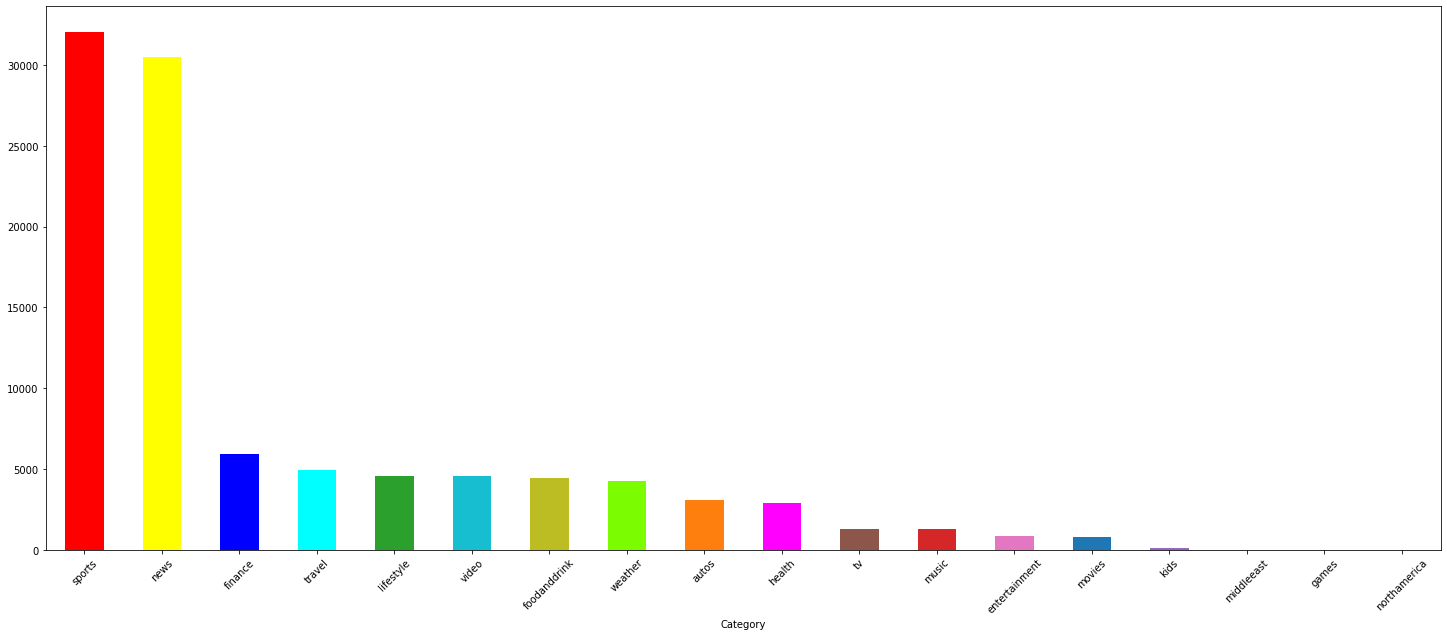

In [ ]:
plt.figure(figsize=(25,10))
news_train['category'].value_counts().plot(kind='bar', color = my_color)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.show()

In [ ]:
dict_subcat = {}
for x in tqdm(range(len(news_train))):
  if(not news_train.loc[x,'subcat'] in dict_subcat):
    dict_subcat[news_train.loc[x,'subcat']] = news_train.loc[x,'category']

dict_cat = {}
for x in dict_subcat:
  if (dict_subcat[x] in dict_cat):
    dict_cat[dict_subcat[x]].append(x)
  else:
    dict_cat[dict_subcat[x]] = [x]

100%|██████████| 101527/101527 [00:00<00:00, 151769.64it/s]


In [ ]:
count_cat = {}
for x in dict_cat:
  count_cat[x] = len(dict_cat[x])
count_cat = dict(sorted(count_cat.items(), key=lambda x: x[1], reverse = True))
print(count_cat)

{'lifestyle': 50, 'news': 35, 'sports': 34, 'finance': 32, 'autos': 25, 'health': 21, 'foodanddrink': 16, 'video': 14, 'entertainment': 13, 'travel': 11, 'music': 10, 'tv': 8, 'movies': 7, 'weather': 3, 'kids': 3, 'middleeast': 1, 'games': 1, 'northamerica': 1}


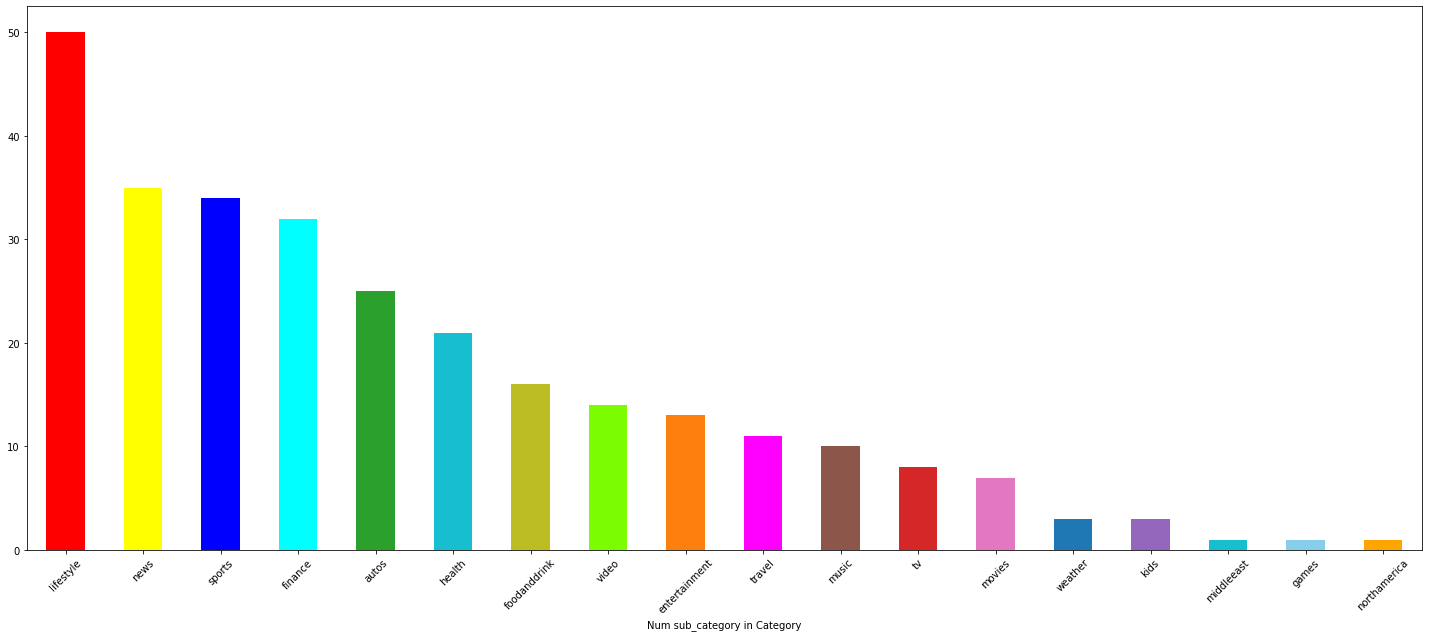

In [ ]:
plt.figure(figsize=(25,10))
pd.Series(count_cat).plot(kind = 'bar', color = my_color)
plt.xticks(rotation=45)
plt.xlabel('Num sub_category in Category')
plt.show()

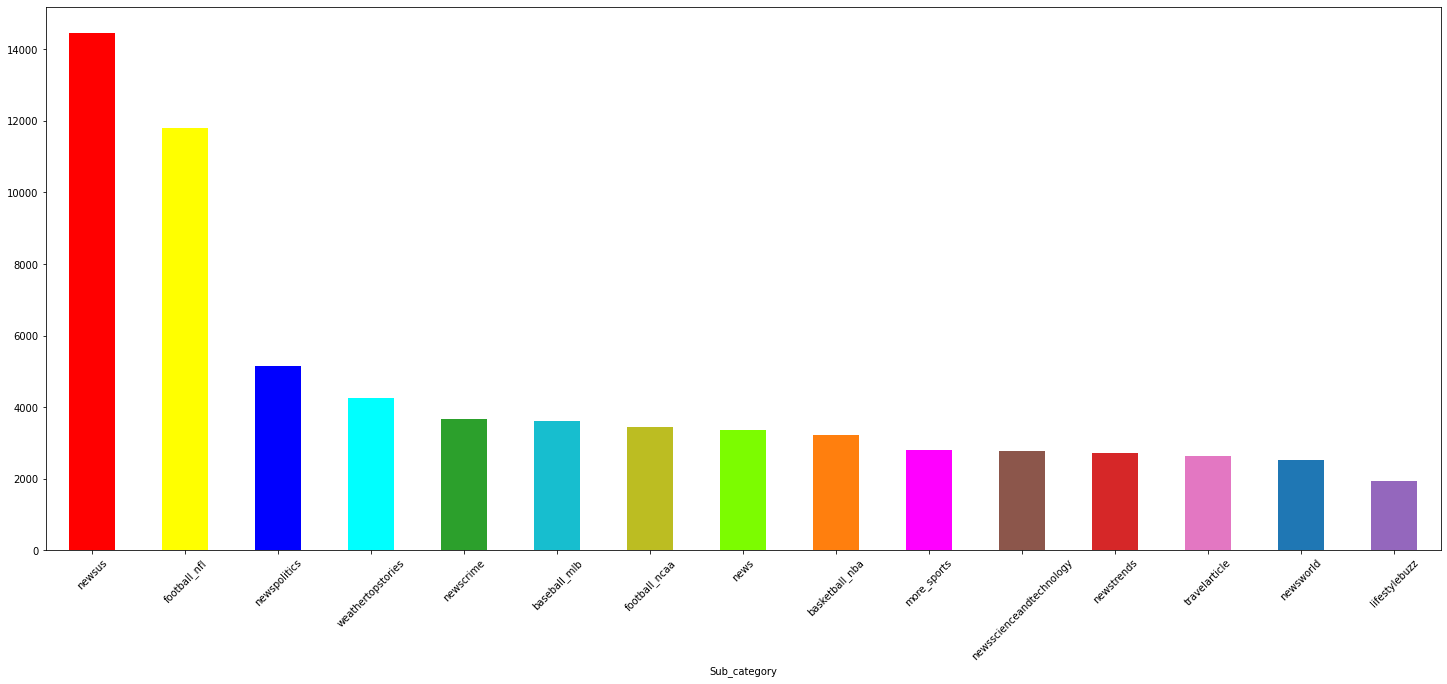

In [ ]:
plt.figure(figsize=(25,10))
news_train['subcat'].value_counts()[:15].plot(kind='bar', color = my_color)
plt.xticks(rotation=45)
plt.xlabel('Sub_category')
plt.show()

In [ ]:
dict_len_title = {}
for x in tqdm(range(len(news_train))):
  len_x_tmp = get_len(news_train.loc[x,'title'])
  if(len_x_tmp in dict_len_title):
    dict_len_title[len_x_tmp] += 1
  else:
    dict_len_title[len_x_tmp] = 1

len_title = pd.DataFrame(sorted(dict_len_title.items()))

100%|██████████| 101527/101527 [00:00<00:00, 107533.85it/s]


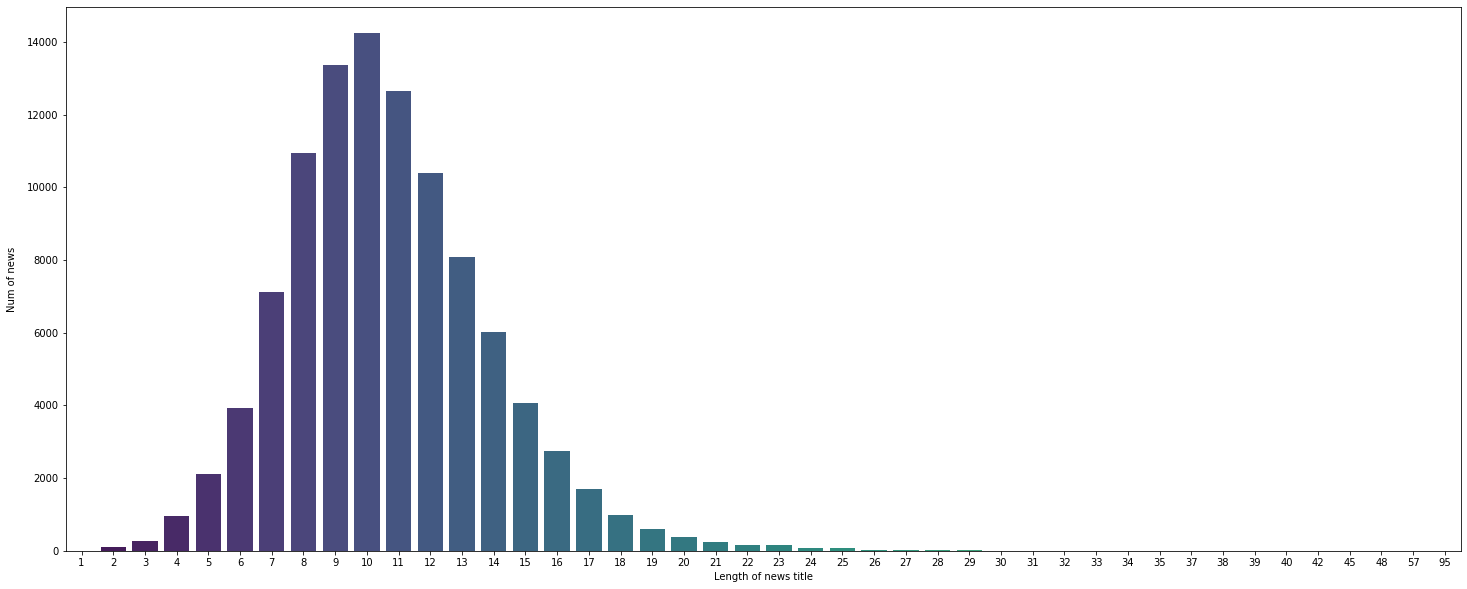

In [ ]:
#x1tmp, x2tmp = getxtick(list(len_title[0]),5)

plt.figure(figsize=(25,10))
sns.barplot(data = len_title, x = 0, y = 1 , palette='viridis')

#plt.xticks(x1tmp, x2tmp)
plt.xlabel('Length of news title')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
news_train['abstract'].replace(np.NaN, '', inplace = True)

In [ ]:
dict_len_abstract = {}
for x in tqdm(range(len(news_train))):
  len_x_tmp = get_len(news_train.loc[x,'abstract'])
  if(len_x_tmp in dict_len_abstract):
    dict_len_abstract[len_x_tmp] += 1
  else:
    if(len_x_tmp > 100):
      if(100 in dict_len_abstract):
        dict_len_abstract[100] += 1
      else:
        dict_len_abstract[100] = 1
    else:
      dict_len_abstract[len_x_tmp] = 1

len_abstract = pd.DataFrame(sorted(dict_len_abstract.items()))

100%|██████████| 101527/101527 [00:01<00:00, 78229.83it/s]


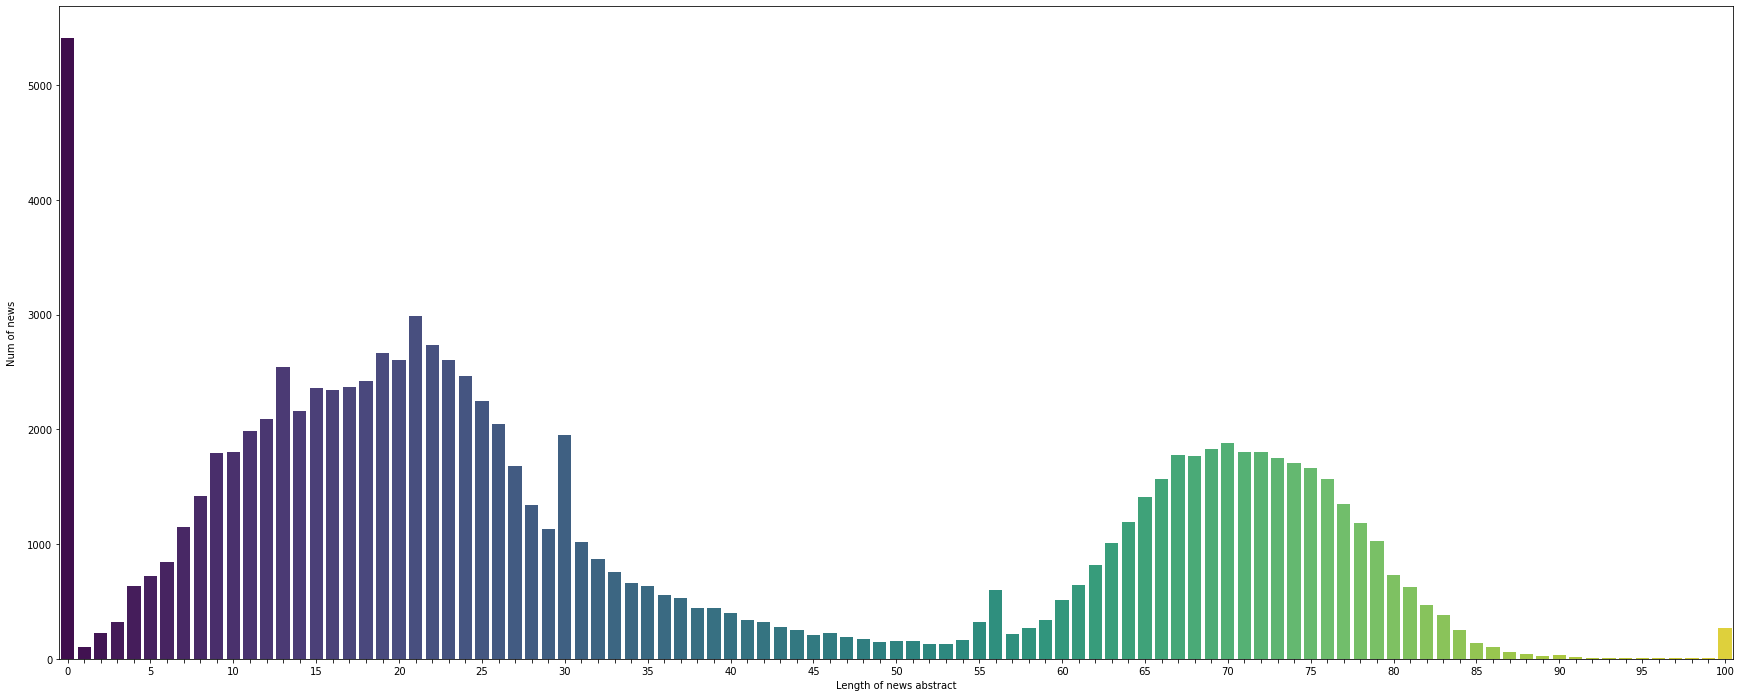

In [ ]:
x1tmp, x2tmp = getxtick(list(len_abstract[0]),5)

plt.figure(figsize=(30,12))
sns.barplot(data = len_abstract, x = 0, y = 1 , palette='viridis')

plt.xticks(x1tmp, x2tmp)
plt.xlabel('Length of news abstract')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
news_train['title_entities'].replace(np.NaN, '[]', inplace = True)
df = list(news_train['title_entities'])

count_tmp = {}

for x in tqdm(df):
  x = eval(x)  
  a = len(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 101527/101527 [00:02<00:00, 42963.28it/s]


 {0: 26056, 1: 41555, 2: 24465, 3: 7643, 4: 1486, 5: 253, 6: 50, 7: 14, 8: 3, 9: 2}


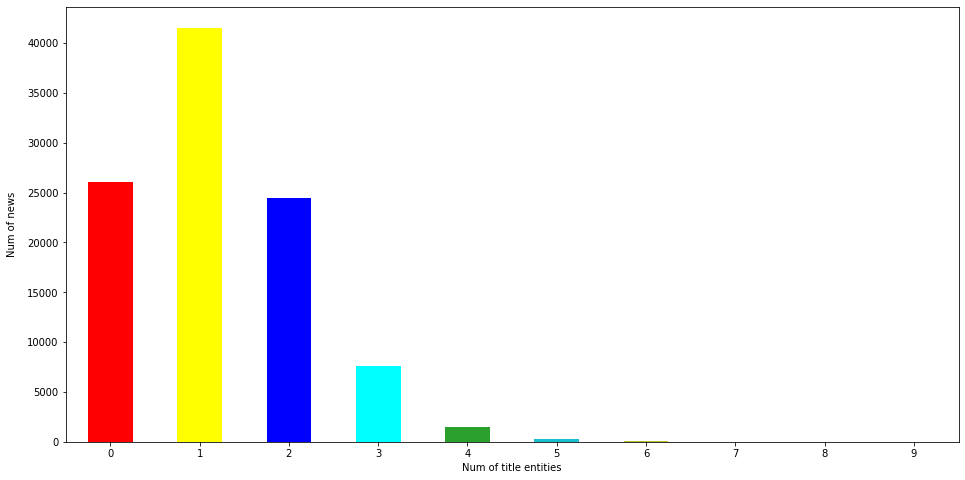

In [ ]:
plt.figure(figsize=(16,8))
pd.Series(count_tmp).plot(kind = 'bar', color = my_color)
plt.xticks(rotation=0)
plt.xlabel('Num of title entities')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
news_train['abstract_entities'].replace(np.NaN, '[]', inplace = True)
df = list(news_train['abstract_entities'])

count_tmp = {}

for x in tqdm(df):
  x = eval(x)  
  a = len(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 101527/101527 [00:04<00:00, 23253.18it/s]


 {0: 25486, 1: 24161, 2: 19735, 3: 13391, 4: 8454, 5: 4998, 6: 2726, 7: 1333, 8: 623, 9: 309, 10: 132, 11: 88, 12: 35, 13: 16, 14: 14, 15: 8, 16: 8, 17: 5, 18: 1, 19: 2, 21: 1, 30: 1}


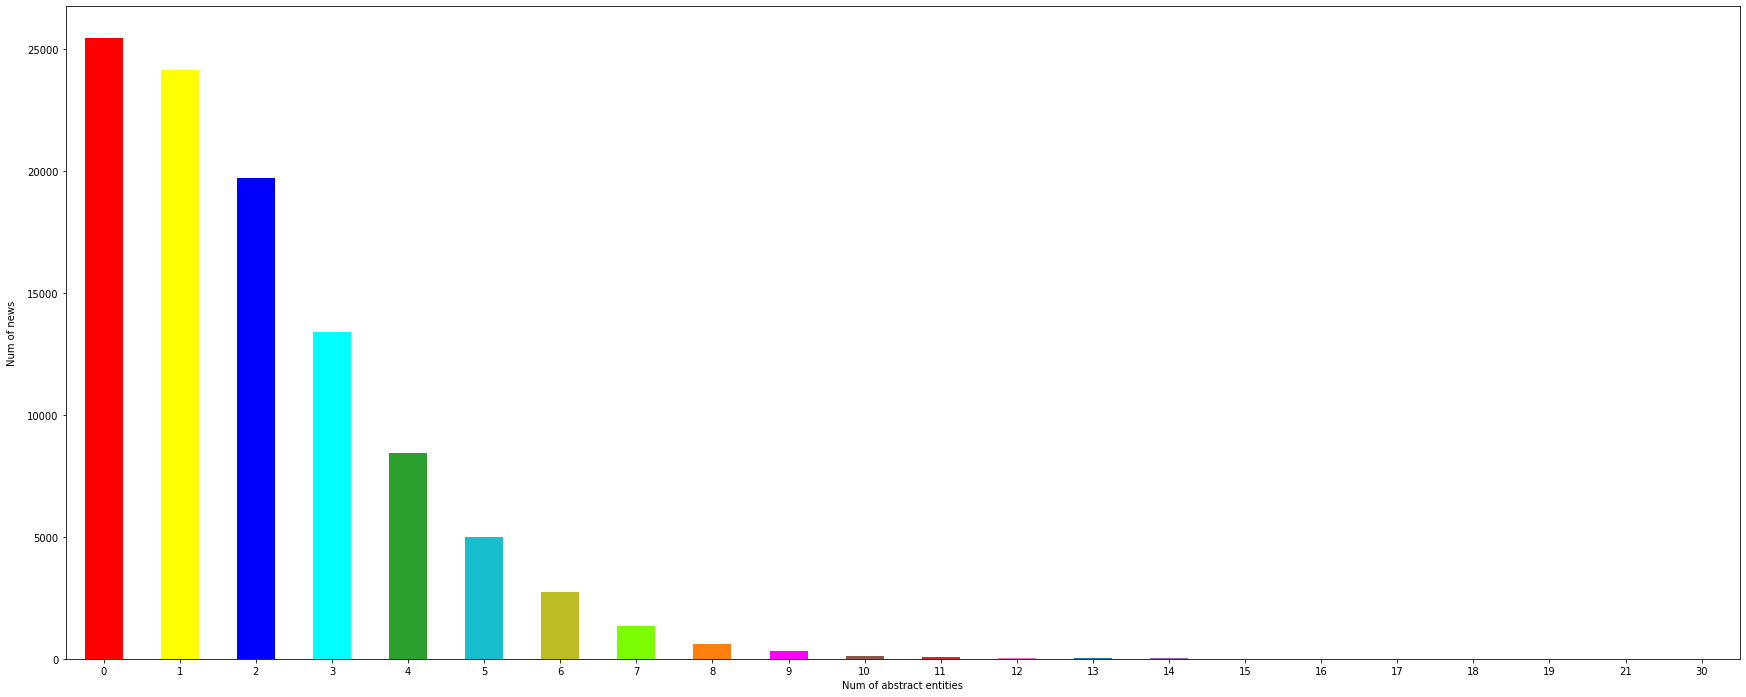

In [ ]:
plt.figure(figsize=(30,12))
pd.Series(count_tmp).plot(kind = 'bar', color = my_color)
plt.xticks(rotation=0)
plt.xlabel('Num of abstract entities')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
behaviors_train.head()

,id,user,time,history,impression
0,1,U87243,11/10/2019 11:30:54 AM,N8668 N39081 N65259 N79529 N73408 N43615 N2937...,N78206-0 N26368-0 N7578-0 N58592-0 N19858-0 N5...
1,2,U598644,11/12/2019 1:45:29 PM,N56056 N8726 N70353 N67998 N83823 N111108 N107...,N47996-0 N82719-0 N117066-0 N8491-0 N123784-0 ...
2,3,U532401,11/13/2019 11:23:03 AM,N128643 N87446 N122948 N9375 N82348 N129412 N5...,N103852-0 N53474-0 N127836-0 N47925-1
3,4,U593596,11/12/2019 12:24:09 PM,N31043 N39592 N4104 N8223 N114581 N92747 N1207...,N38902-0 N76434-0 N71593-0 N100073-0 N108736-0...
4,5,U239687,11/14/2019 8:03:01 PM,N65250 N122359 N71723 N53796 N41663 N41484 N11...,N76209-0 N48841-0 N67937-0 N62235-0 N6307-0 N3...


In [ ]:
for ft in behaviors_train.columns:
    print(ft," : "," len: ",len(behaviors_train[ft].unique()),'\n',behaviors_train[ft].unique())

id  :   len:  2232748 
 [      1       2       3 ... 2232746 2232747 2232748]
user  :   len:  711222 
 ['U87243' 'U598644' 'U532401' ... 'U209837' 'U501719' 'U151246']
time  :   len:  453122 
 ['11/10/2019 11:30:54 AM' '11/12/2019 1:45:29 PM' '11/13/2019 11:23:03 AM'
 ... '11/10/2019 8:01:30 PM' '11/10/2019 7:23:33 PM'
 '11/11/2019 10:03:39 PM']
history  :   len:  689270 
 ['N8668 N39081 N65259 N79529 N73408 N43615 N29379 N32031 N110232 N101921 N12614 N129591 N105760 N60457 N1229 N64932'
 'N56056 N8726 N70353 N67998 N83823 N111108 N107520 N53168 N78756 N106411 N81824 N85691 N16173 N24446 N120926 N19175 N126159 N26373 N72369 N73228 N111873 N88638 N29503 N31055'
 'N128643 N87446 N122948 N9375 N82348 N129412 N54948 N36094 N44660 N3948 N21332 N81364 N83062 N87788 N59280 N31323'
 ... 'N45706 N58732' 'N108621 N87105 N63676 N102743 N106985 N35508'
 'N27587 N49668']
impression  :   len:  1972081 
 ['N78206-0 N26368-0 N7578-0 N58592-0 N19858-0 N58258-0 N18478-0 N2591-0 N97778-0 N32954-0 N94157-

In [ ]:
for ft in behaviors_train.columns:
    print(ft," : ",behaviors_train[ft].isna().sum())

id  :  0
user  :  0
time  :  0
history  :  46065
impression  :  0


In [ ]:
df_nohis = behaviors_train[behaviors_train.history.isna()]

In [ ]:
print(df_nohis)

              id     user                    time history  \
70            71  U285096   11/11/2019 5:12:29 PM     NaN   
120          121  U620890   11/13/2019 3:25:30 PM     NaN   
138          139  U204203  11/14/2019 10:49:49 AM     NaN   
156          157   U89128   11/14/2019 1:46:35 PM     NaN   
193          194  U187601   11/13/2019 9:14:36 AM     NaN   
...          ...      ...                     ...     ...   
2232688  2232689  U548928   11/13/2019 7:12:53 PM     NaN   
2232694  2232695  U686420  11/13/2019 10:15:58 AM     NaN   
2232734  2232735  U305603  11/14/2019 11:51:44 AM     NaN   
2232736  2232737  U215047   11/10/2019 6:16:42 AM     NaN   
2232741  2232742  U284157   11/12/2019 8:05:46 AM     NaN   

                                                impression  
70           N93411-0 N85986-0 N90968-1 N111088-0 N21883-0  
120      N123968-0 N39403-0 N10285-0 N16244-0 N94594-0 ...  
138      N102458-0 N91865-0 N76665-0 N51163-0 N90184-0 ...  
156      N45410-0 N8508

In [ ]:
len(df_nohis['user'].unique())

12857

In [ ]:
list_impression = list(df_nohis['impression'])

In [ ]:
print(len(list_impression))

46065


In [ ]:
df = list(behaviors_train['time'])

count_tmp = {}

for x in tqdm(df):
  a = x.split('/')
  if(a[1] in count_tmp):
    count_tmp[a[1]] += 1
  else:
    count_tmp[a[1]] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 2232748/2232748 [00:01<00:00, 1717537.58it/s]


 {'9': 192552, '10': 212343, '11': 464467, '12': 478375, '13': 453494, '14': 431517}


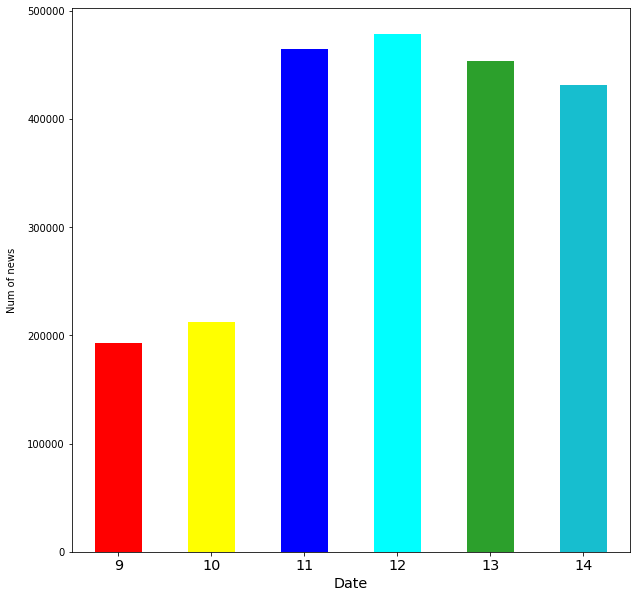

In [ ]:
plt.figure(figsize=(10,10))
pd.Series(count_tmp).plot(kind = 'bar', color = my_color)
plt.xticks(rotation=0, fontsize = 'x-large')
plt.xlabel('Date',fontsize = 'x-large')
plt.xlabel('Date')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
df = list(behaviors_train['time'])

count_tmp = {}

for x in tqdm(df):
  a = get_hour(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 2232748/2232748 [00:02<00:00, 1030046.22it/s]


 {0: 15071, 1: 16448, 2: 24847, 3: 44167, 4: 77672, 5: 122882, 6: 152483, 7: 168434, 8: 176084, 9: 151179, 10: 173596, 11: 179368, 12: 159827, 13: 149316, 14: 122446, 15: 94245, 16: 90618, 17: 74841, 18: 64459, 19: 52683, 20: 42809, 21: 35965, 22: 24643, 23: 18665}


In [ ]:
for x in range(24):
  print("'",x,"h-",x+1,"h',",sep='',end='')

'0h-1h','1h-2h','2h-3h','3h-4h','4h-5h','5h-6h','6h-7h','7h-8h','8h-9h','9h-10h','10h-11h','11h-12h','12h-13h','13h-14h','14h-15h','15h-16h','16h-17h','17h-18h','18h-19h','19h-20h','20h-21h','21h-22h','22h-23h','23h-24h',

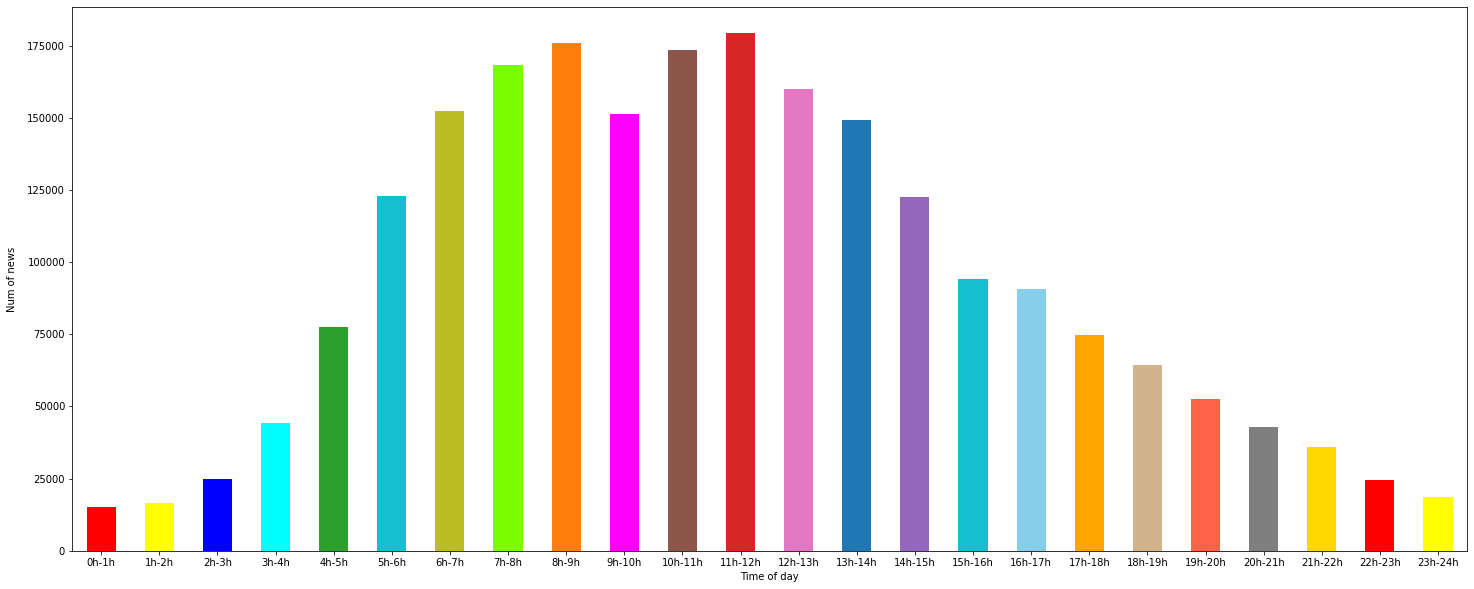

In [ ]:
plt.figure(figsize=(25,10))
pd.Series(count_tmp).plot(kind = 'bar', color = my_color)
plt.xticks(rotation=0)
plt.xticks(list(np.arange(0,24,1)),['0h-1h','1h-2h','2h-3h','3h-4h','4h-5h',
                                    '5h-6h','6h-7h','7h-8h','8h-9h','9h-10h',
                                    '10h-11h','11h-12h','12h-13h','13h-14h',
                                    '14h-15h','15h-16h','16h-17h','17h-18h',
                                    '18h-19h','19h-20h','20h-21h','21h-22h',
                                    '22h-23h','23h-24h'])
plt.xlabel('Time of day')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
df = list(behaviors_train['user'])

df_u = list(behaviors_train['user'].unique())

In [ ]:
print(len(df))
print(len(df_u))

cnt_user = {}

for x in df:
  if(x in cnt_user):
    cnt_user[x] += 1
  else:
    cnt_user[x] = 1

2232748
711222


In [ ]:
cnt_user_f = {}

for x in cnt_user.values():
  if(x in cnt_user_f):
    cnt_user_f[x] += 1
  else:
    cnt_user_f[x] = 1

cnt_user_f = dict(sorted(cnt_user_f.items()))

print(cnt_user_f)

{1: 232645, 2: 168707, 3: 105810, 4: 64956, 5: 41338, 6: 27485, 7: 18732, 8: 13263, 9: 9389, 10: 6924, 11: 5209, 12: 3852, 13: 2794, 14: 2118, 15: 1710, 16: 1309, 17: 1040, 18: 781, 19: 597, 20: 476, 21: 393, 22: 317, 23: 216, 24: 209, 25: 168, 26: 124, 27: 108, 28: 95, 29: 69, 30: 73, 31: 38, 32: 38, 33: 44, 34: 28, 35: 17, 36: 20, 37: 18, 38: 16, 39: 18, 40: 11, 41: 11, 42: 8, 43: 3, 44: 6, 45: 2, 46: 2, 47: 5, 48: 6, 49: 2, 50: 6, 51: 2, 52: 1, 54: 3, 55: 2, 57: 2, 59: 1, 60: 1, 62: 1, 66: 1, 67: 1, 106: 1}


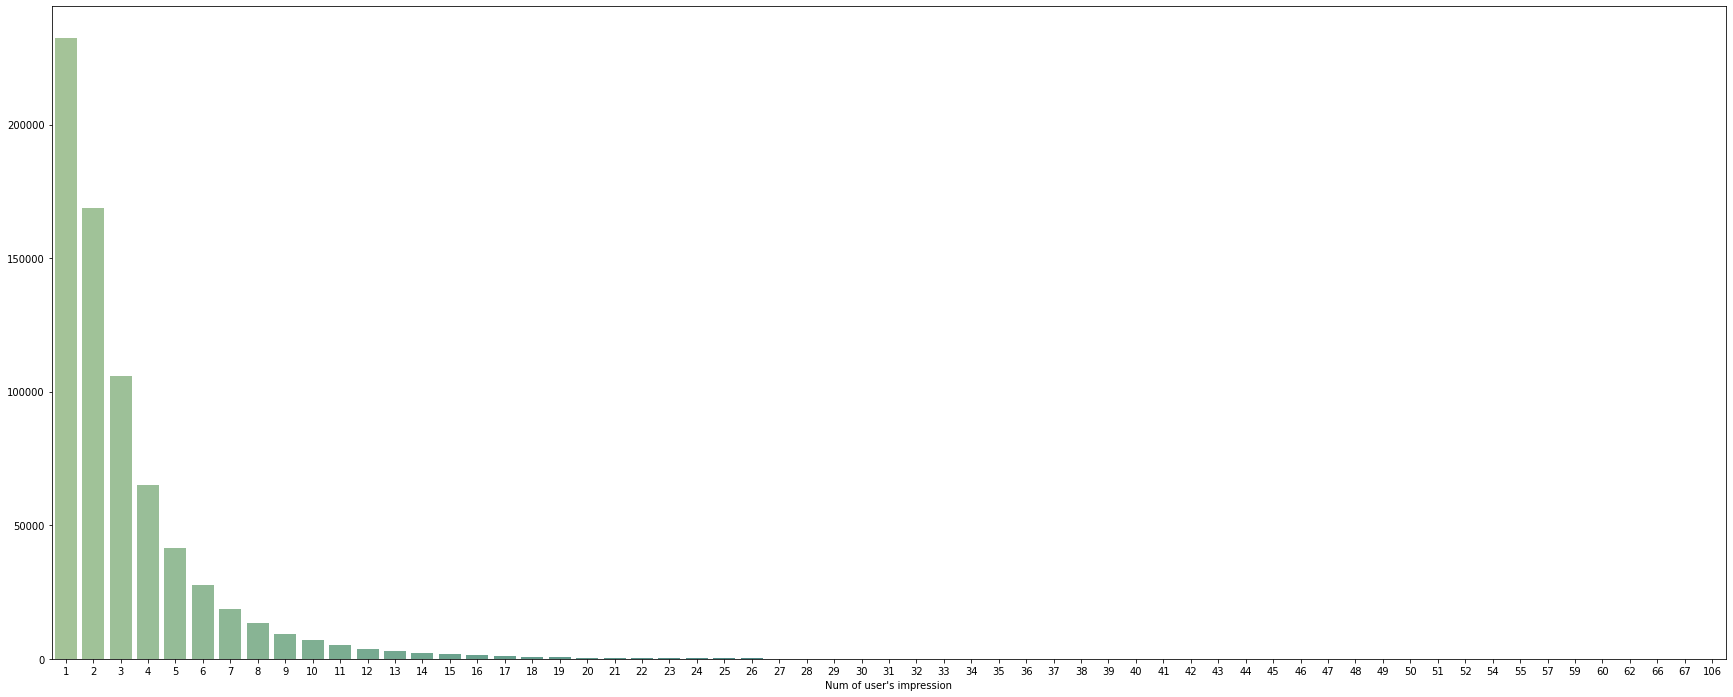

In [ ]:
cnt_user_f_tmp = pd.DataFrame(cnt_user_f.items())

plt.figure(figsize=(30,12))
sns.barplot(data = cnt_user_f_tmp, x = 0, y = 1 , palette='crest')
plt.xlabel("Num of user's impression")
plt.ylabel('')
plt.show()

In [ ]:
behaviors_train.replace(np.NaN, '', inplace = True)
df = list(behaviors_train['history'])

count_tmp = {}

for x in tqdm(df):
  a = get_len(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 2232748/2232748 [00:15<00:00, 146362.43it/s]


 {0: 46065, 1: 30740, 2: 52080, 3: 75919, 4: 86952, 5: 83726, 6: 78792, 7: 73876, 8: 67973, 9: 63602, 10: 59517, 11: 56148, 12: 53580, 13: 49922, 14: 47989, 15: 45191, 16: 43487, 17: 40601, 18: 38784, 19: 36436, 20: 35088, 21: 34365, 22: 32504, 23: 30918, 24: 29853, 25: 28524, 26: 27691, 27: 26427, 28: 25531, 29: 24759, 30: 23115, 31: 22215, 32: 21636, 33: 21313, 34: 19858, 35: 20492, 36: 18465, 37: 18390, 38: 17499, 39: 18601, 40: 16240, 41: 16448, 42: 15816, 43: 14873, 44: 13759, 45: 14256, 46: 13767, 47: 13381, 48: 12749, 49: 12604, 50: 12402, 51: 11676, 52: 11465, 53: 10800, 54: 10275, 55: 9895, 56: 9549, 57: 9584, 58: 9501, 59: 8690, 60: 9409, 61: 8365, 62: 8163, 63: 7727, 64: 7828, 65: 7468, 66: 6876, 67: 7097, 68: 7149, 69: 6728, 70: 6671, 71: 6705, 72: 6080, 73: 6011, 74: 5899, 75: 5873, 76: 5866, 77: 5520, 78: 4950, 79: 5052, 80: 5481, 81: 5274, 82: 4942, 83: 4500, 84: 4505, 85: 4547, 86: 4314, 87: 4424, 88: 3595, 89: 3994, 90: 3678, 91: 3869, 92: 3747, 93: 3817, 94: 3643, 95

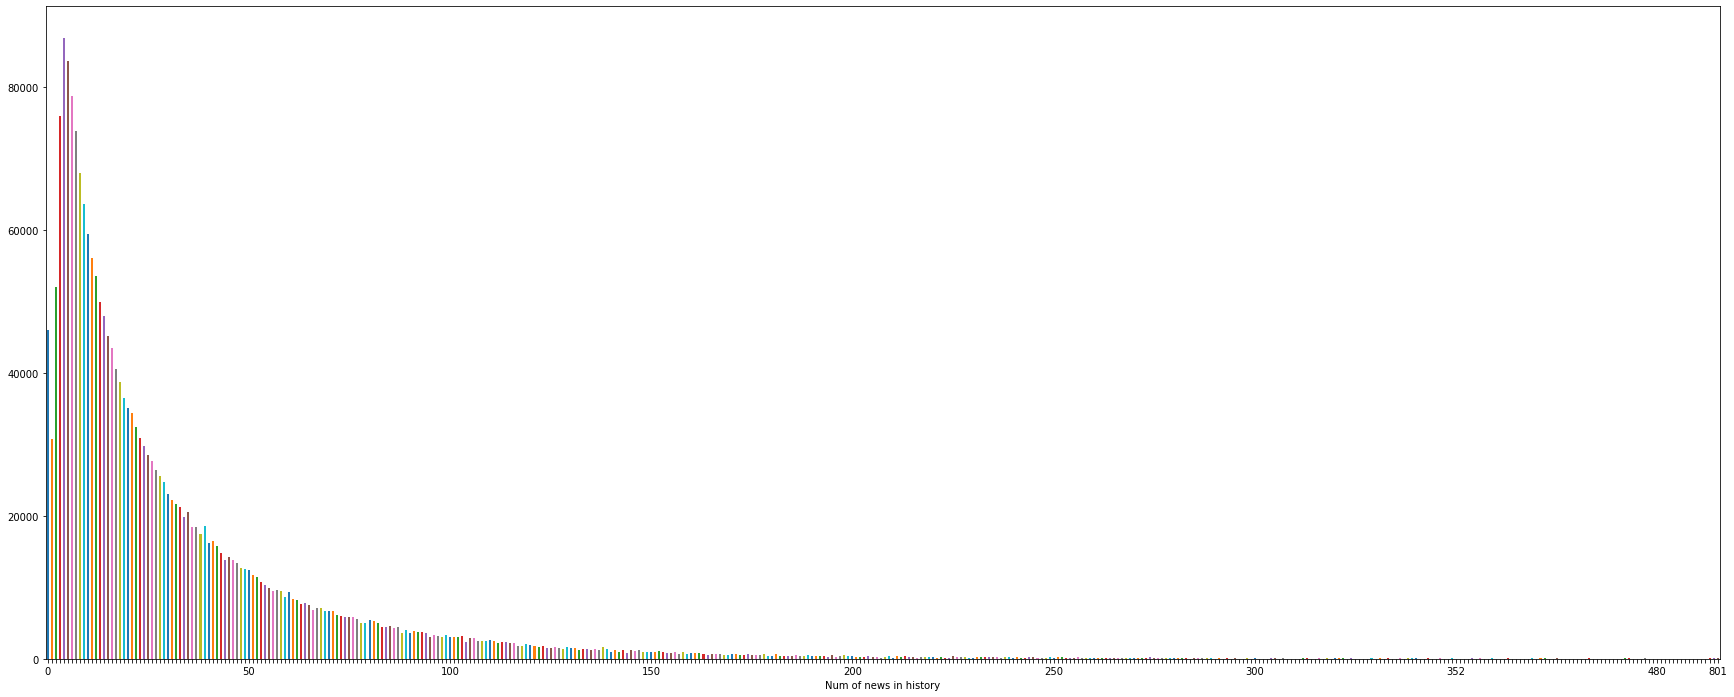

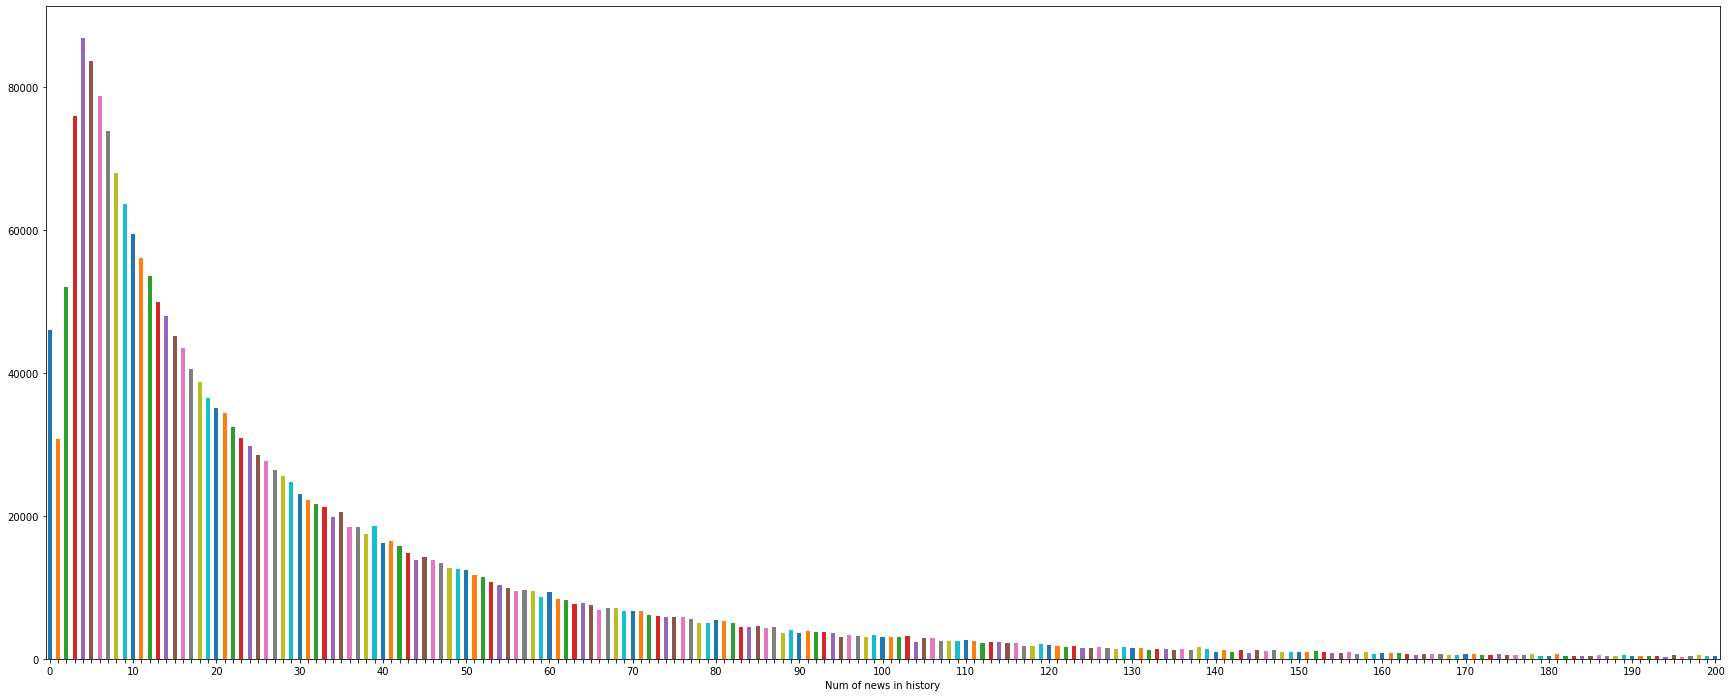

In [ ]:
x1tmp, x2tmp = getxtick(list(count_tmp),50)

plt.figure(figsize=(30,12))
pd.Series(count_tmp).loc[:].plot(kind = 'bar', color = mcolors.TABLEAU_COLORS)
plt.xticks(x1tmp, x2tmp, rotation = 0)
plt.xlabel('Num of news in history')
plt.show()



x1tmp, x2tmp = getxtick(list(count_tmp)[:201],10)

plt.figure(figsize=(30,12))
pd.Series(count_tmp).loc[:200].plot(kind = 'bar', color = mcolors.TABLEAU_COLORS)
plt.xticks(x1tmp, x2tmp, rotation = 0)
plt.xlabel('Num of news in history')
plt.show()

In [ ]:
df = list(behaviors_train['impression'])
print(len(df))

count_tmp = {}

for x in tqdm(df):
  a = get_len(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

2232748


100%|██████████| 2232748/2232748 [00:17<00:00, 124653.73it/s]


 {2: 147996, 3: 48494, 4: 96802, 5: 41112, 6: 44649, 7: 91949, 8: 32655, 9: 40880, 10: 62350, 11: 45100, 12: 55071, 13: 36441, 14: 34026, 15: 30914, 16: 34000, 17: 45143, 18: 29189, 19: 29116, 20: 30782, 21: 32161, 22: 43202, 23: 33852, 24: 29497, 25: 28488, 26: 31843, 27: 37121, 28: 29324, 29: 26795, 30: 34790, 31: 20700, 32: 22454, 33: 19770, 34: 20046, 35: 18500, 36: 18878, 37: 25526, 38: 18571, 39: 16923, 40: 15265, 41: 16864, 42: 18665, 43: 20171, 44: 15592, 45: 14181, 46: 14531, 47: 14360, 48: 16756, 49: 17903, 50: 15779, 51: 11823, 52: 10771, 53: 10619, 54: 12258, 55: 12783, 56: 10558, 57: 10631, 58: 9905, 59: 9766, 60: 11040, 61: 11063, 62: 8979, 63: 8997, 64: 8823, 65: 9156, 66: 10223, 67: 10390, 68: 8931, 69: 9038, 70: 8749, 71: 7456, 72: 8526, 73: 8823, 74: 6837, 75: 6997, 76: 7088, 77: 6666, 78: 6812, 79: 7208, 80: 5976, 81: 6041, 82: 6265, 83: 6155, 84: 6393, 85: 6812, 86: 5953, 87: 5913, 88: 5734, 89: 5982, 90: 5612, 91: 5446, 92: 5198, 93: 4636, 94: 4502, 95: 4655, 96: 

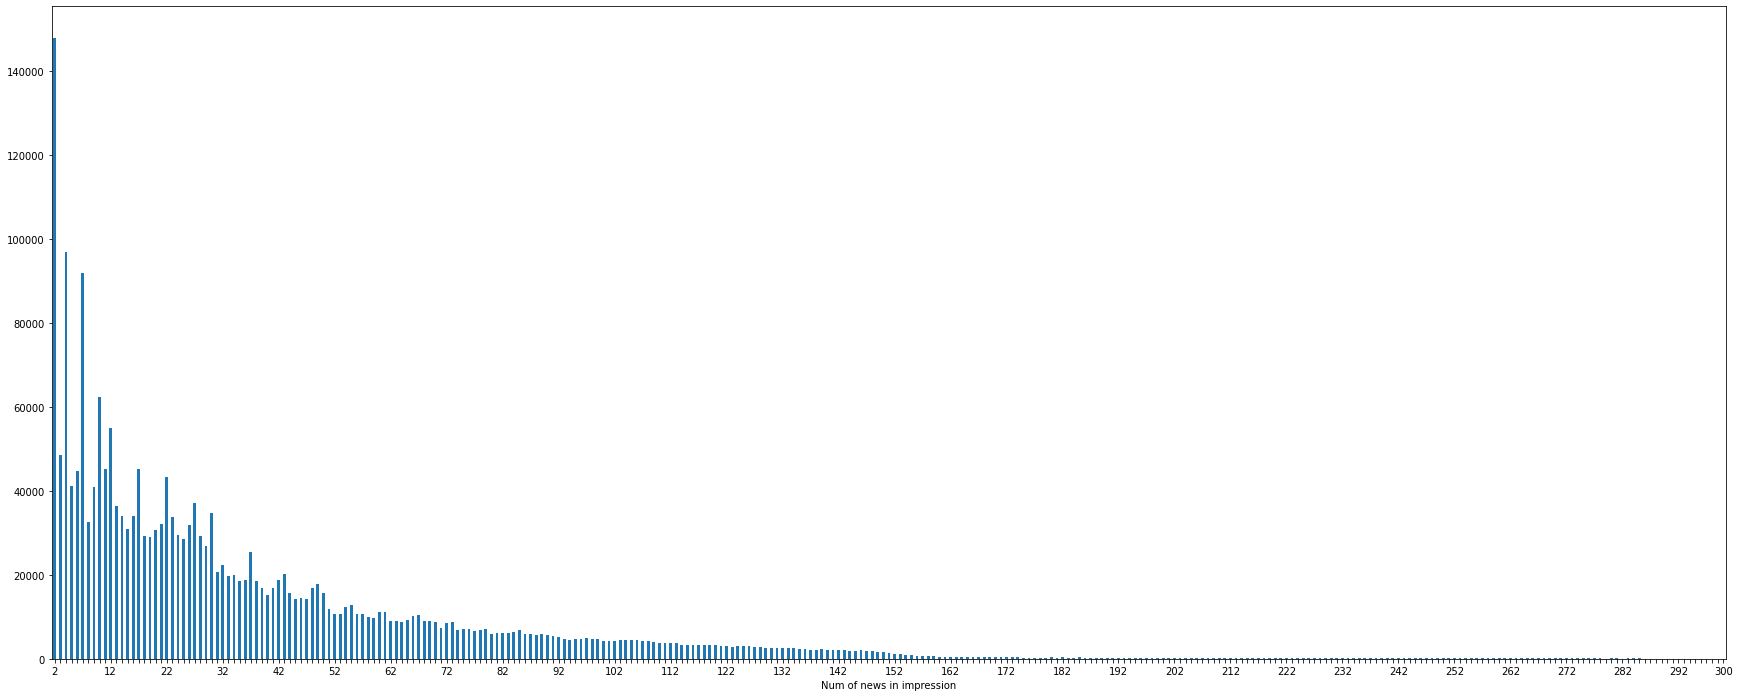

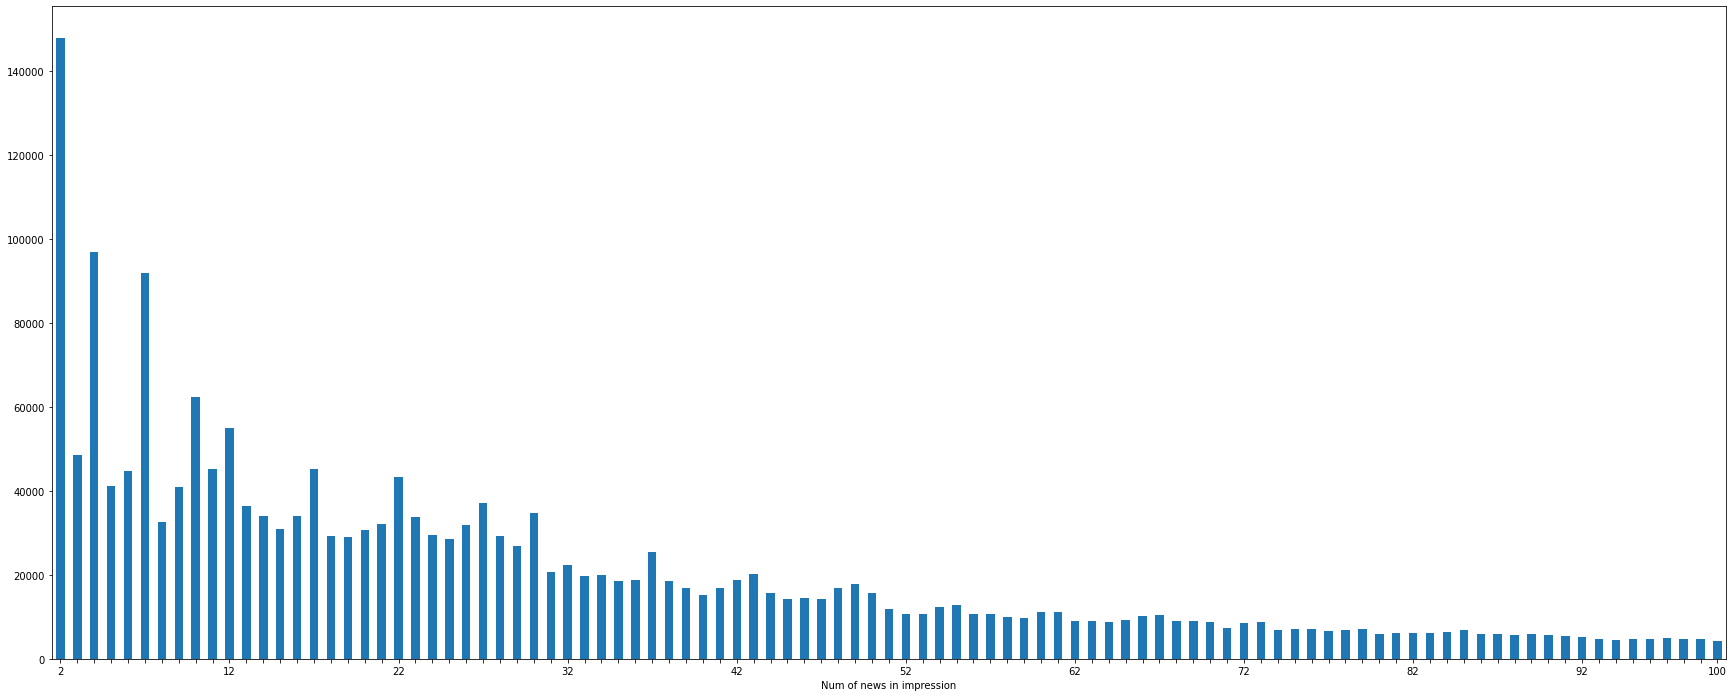

In [ ]:
x1tmp, x2tmp = getxtick(list(count_tmp),10)

plt.figure(figsize=(30,12))
pd.Series(count_tmp).plot(kind = 'bar')
plt.xticks(x1tmp, x2tmp, rotation=0)
plt.xlabel('Num of news in impression')
plt.show()


x1tmp, x2tmp = getxtick(list(count_tmp)[:99],10)

plt.figure(figsize=(30,12))
pd.Series(count_tmp).loc[:100].plot(kind = 'bar')
plt.xticks(x1tmp, x2tmp, rotation=0)
plt.xlabel('Num of news in impression')
plt.show()


In [ ]:
count_tmp = {}

for x in tqdm(df):
  a = get_num_click(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 2232748/2232748 [00:31<00:00, 70222.03it/s]


 {1: 1613818, 2: 366286, 3: 131740, 4: 57443, 5: 28058, 6: 14557, 7: 8047, 8: 4730, 9: 2761, 10: 1708, 11: 1165, 12: 757, 13: 495, 14: 325, 15: 228, 16: 156, 17: 116, 18: 88, 19: 62, 20: 35, 21: 34, 22: 30, 23: 24, 24: 22, 25: 19, 26: 9, 27: 5, 28: 5, 29: 2, 30: 3, 31: 4, 32: 1, 34: 2, 35: 5, 36: 2, 38: 2, 39: 1, 43: 1, 44: 1, 51: 1}


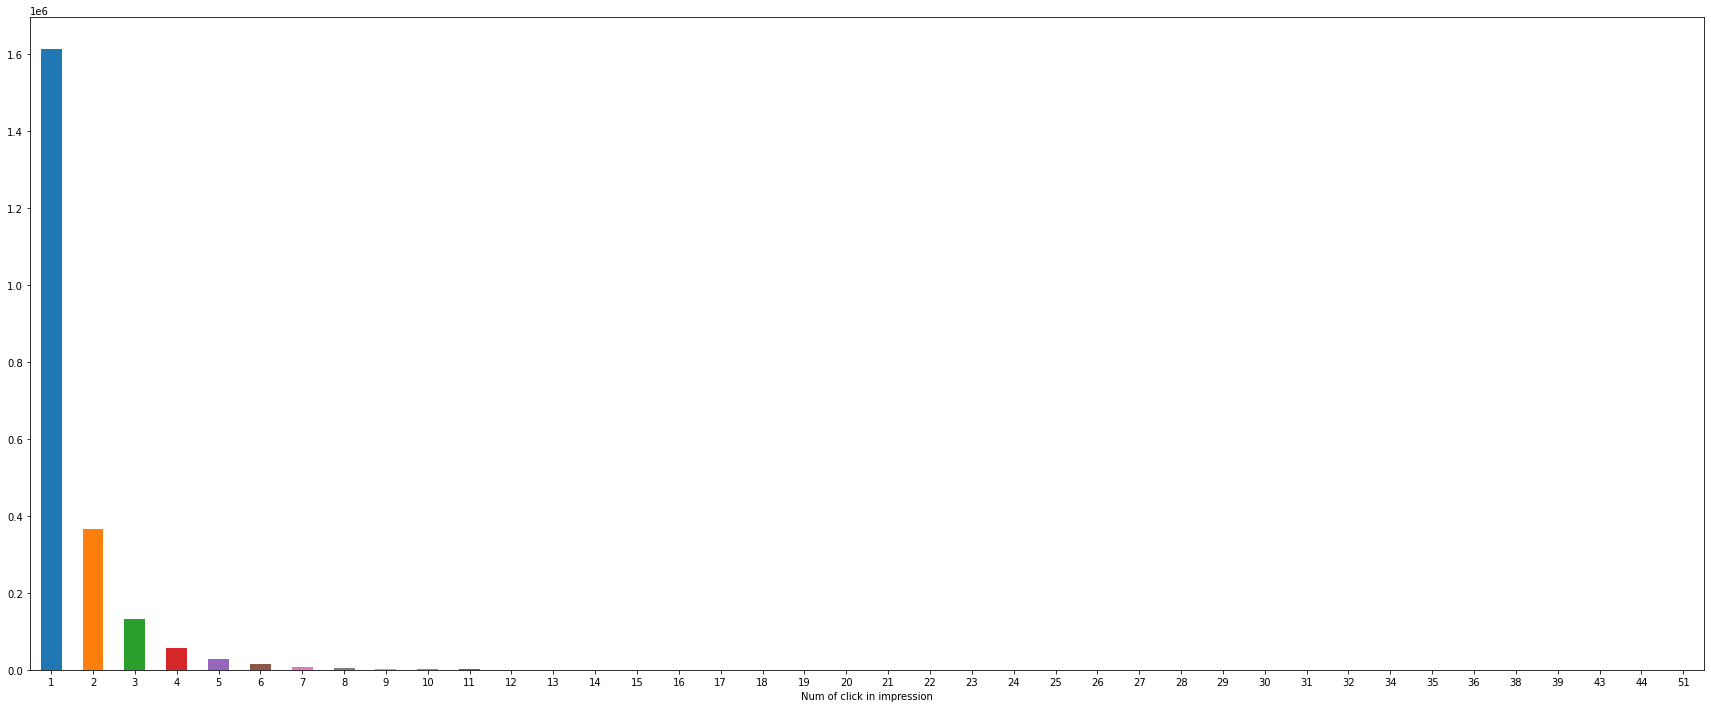

In [ ]:
plt.figure(figsize=(30,12))
pd.Series(count_tmp).loc[:].plot(kind = 'bar', color = mcolors.TABLEAU_COLORS)
plt.xticks(rotation=0)
plt.xlabel('Num of click in impression')
plt.show()

In [ ]:
count_tmp = {}

for x in tqdm(df):
  a = get_len(x)
  b = get_num_click(x)
  if(a in count_tmp):
    if(b in count_tmp[a]):
      count_tmp[a][b] += 1
    else:
      count_tmp[a][b] = 1
  else:
    count_tmp[a] = {}   
    count_tmp[a][b] = 1   

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 2232748/2232748 [00:47<00:00, 46606.82it/s]


 {2: {1: 147996}, 3: {1: 48025, 2: 469}, 4: {1: 93937, 2: 2833, 3: 32}, 5: {1: 39551, 2: 1514, 3: 44, 4: 3}, 6: {1: 41797, 2: 2689, 3: 156, 4: 6, 5: 1}, 7: {1: 84229, 2: 7161, 3: 509, 4: 46, 5: 4}, 8: {1: 29334, 2: 2999, 3: 283, 4: 36, 5: 3}, 9: {1: 35941, 2: 4396, 3: 471, 4: 68, 5: 4}, 10: {3: 1451, 1: 52254, 2: 8201, 4: 335, 5: 84, 6: 16, 7: 8, 8: 1}, 11: {1: 39240, 2: 5107, 3: 647, 4: 91, 5: 12, 6: 2, 7: 1}, 12: {1: 46906, 2: 6892, 3: 1075, 4: 169, 5: 26, 6: 3}, 13: {2: 4814, 1: 30748, 3: 726, 4: 123, 5: 23, 6: 4, 7: 3}, 14: {2: 4579, 1: 28492, 3: 782, 4: 134, 5: 29, 6: 10}, 15: {1: 25364, 2: 4573, 3: 786, 4: 156, 5: 28, 6: 6, 7: 1}, 16: {1: 27877, 2: 4991, 3: 936, 5: 28, 4: 149, 6: 15, 9: 1, 8: 1, 7: 2}, 17: {1: 36106, 3: 1338, 2: 7292, 4: 319, 5: 66, 9: 1, 7: 4, 6: 17}, 18: {1: 23381, 3: 913, 2: 4620, 4: 210, 5: 46, 6: 11, 8: 2, 7: 6}, 19: {4: 242, 1: 23152, 2: 4629, 3: 1034, 5: 40, 7: 2, 6: 17}, 20: {1: 24108, 2: 5103, 3: 1153, 5: 90, 4: 298, 6: 26, 7: 4}, 21: {1: 24791, 2: 5588

In [ ]:
sum = 0.0
click = 0.0
for x in count_tmp:
  for y in count_tmp[x]:
    sum += count_tmp[x][y]*x
    click += y*count_tmp[x][y]

print(click,sum)
print(click/sum*100)

3383656.0 83507374.0
4.051924803670631


**PROCESS DEV FILE**

---



In [ ]:
news_dev.head()

,news,category,subcat,title,abstract,url,title_entities,abstract_entities
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
3,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
4,N75236,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."


In [ ]:
news_dev.describe()

,news,category,subcat,title,abstract,url,title_entities,abstract_entities
count,72023,72023,72023,72023,68400,72023,72021,72018
unique,72023,17,269,70316,65871,72022,48107,51034
top,N88753,news,newsus,Powerball Winning Numbers For 10/26/2019 Drawi...,What's the weather today? What's the weather f...,[],[],[]
freq,1,21826,9971,21,224,2,18734,18675


In [ ]:
for ft in news_dev.columns:
    print(ft," : "," len: ",len(news_dev[ft].unique()),'\n',news_dev[ft].unique())

news  :   len:  72023 
 ['N88753' 'N23144' 'N86255' ... 'N57903' 'N74617' 'N56840']
category  :   len:  17 
 ['lifestyle' 'health' 'news' 'sports' 'weather' 'entertainment'
 'foodanddrink' 'autos' 'travel' 'video' 'tv' 'finance' 'movies' 'music'
 'kids' 'middleeast' 'games']
subcat  :   len:  269 
 ['lifestyleroyals' 'weightloss' 'medical' 'newsworld' 'voices' 'cardio'
 'football_nfl' 'newsscienceandtechnology' 'weathertopstories' 'gaming'
 'recipes' 'lifestylelovesex' 'nutrition' 'autosenthusiasts' 'autossports'
 'wellness' 'health-news' 'celebrity' 'travelarticle' 'autossuvs'
 'newspolitics' 'more_sports' 'traveltripideas' 'animals' 'autosnews'
 'newsbusiness' 'golf' 'newstrends' 'lifestylepetsanimals' 'football_ncaa'
 'fitness' 'newsus' 'tv-gallery' 'lifestylehoroscope' 'basketball_nba'
 'news' 'lifestylebuzz' 'shop-all' 'newsphotos' 'lifestylemindandsoul'
 'basketball_ncaa' 'finance-real-estate' 'quickandeasy' 'tv-celebrity'
 'lifestyleparenting' 'travelnews' 'movies-gallery' 'tips

In [ ]:
for ft in news_dev.columns:
    print(ft," : ",news_dev[ft].isna().sum())

news  :  0
category  :  0
subcat  :  0
title  :  0
abstract  :  3623
url  :  0
title_entities  :  2
abstract_entities  :  5


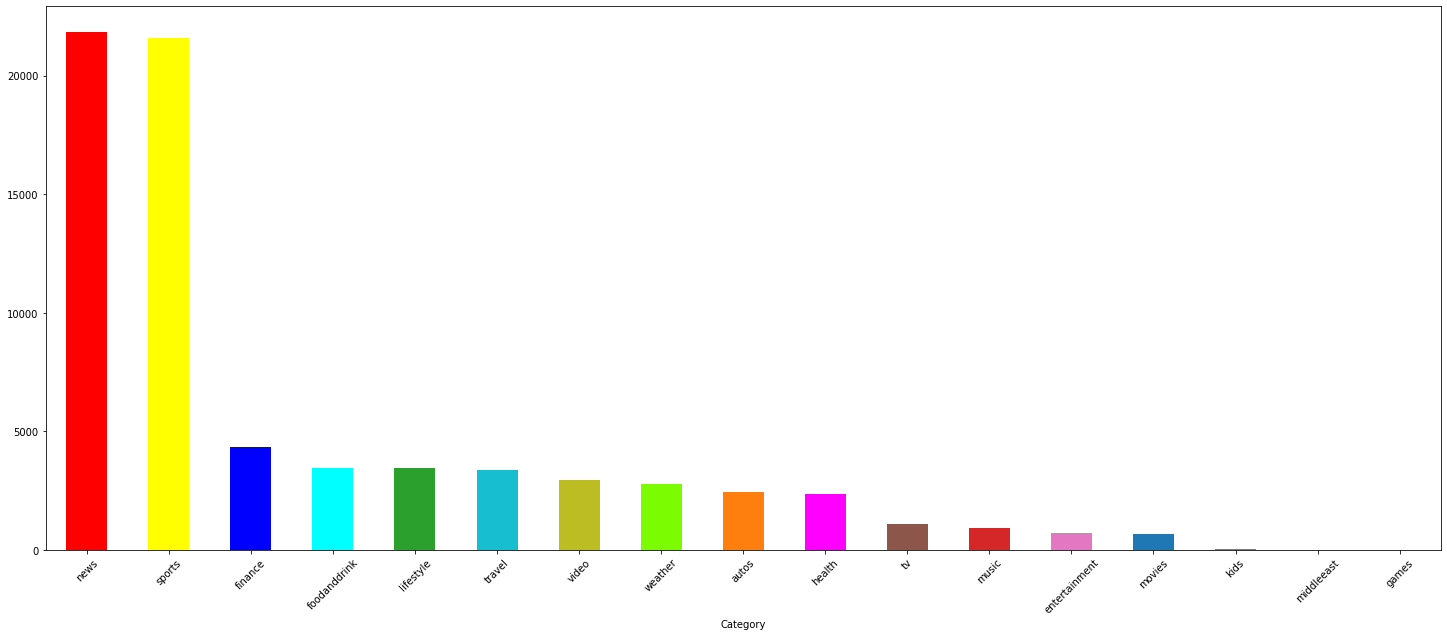

In [ ]:
plt.figure(figsize=(25,10))
news_dev['category'].value_counts().plot(kind='bar', color = my_color)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.show()

In [ ]:
dict_subcat = {}
for x in tqdm(range(len(news_dev))):
  if(not news_dev.loc[x,'subcat'] in dict_subcat):
    dict_subcat[news_dev.loc[x,'subcat']] = news_dev.loc[x,'category']

dict_cat = {}
for x in dict_subcat:
  if (dict_subcat[x] in dict_cat):
    dict_cat[dict_subcat[x]].append(x)
  else:
    dict_cat[dict_subcat[x]] = [x]

100%|██████████| 72023/72023 [00:00<00:00, 106787.35it/s]


In [ ]:
count_cat = {}
for x in dict_cat:
  count_cat[x] = len(dict_cat[x])
count_cat = dict(sorted(count_cat.items(), key=lambda x: x[1], reverse = True))
print(count_cat)

{'lifestyle': 47, 'news': 35, 'sports': 30, 'finance': 29, 'autos': 25, 'health': 21, 'foodanddrink': 16, 'video': 13, 'entertainment': 11, 'travel': 10, 'music': 10, 'tv': 8, 'movies': 7, 'weather': 3, 'kids': 2, 'middleeast': 1, 'games': 1}


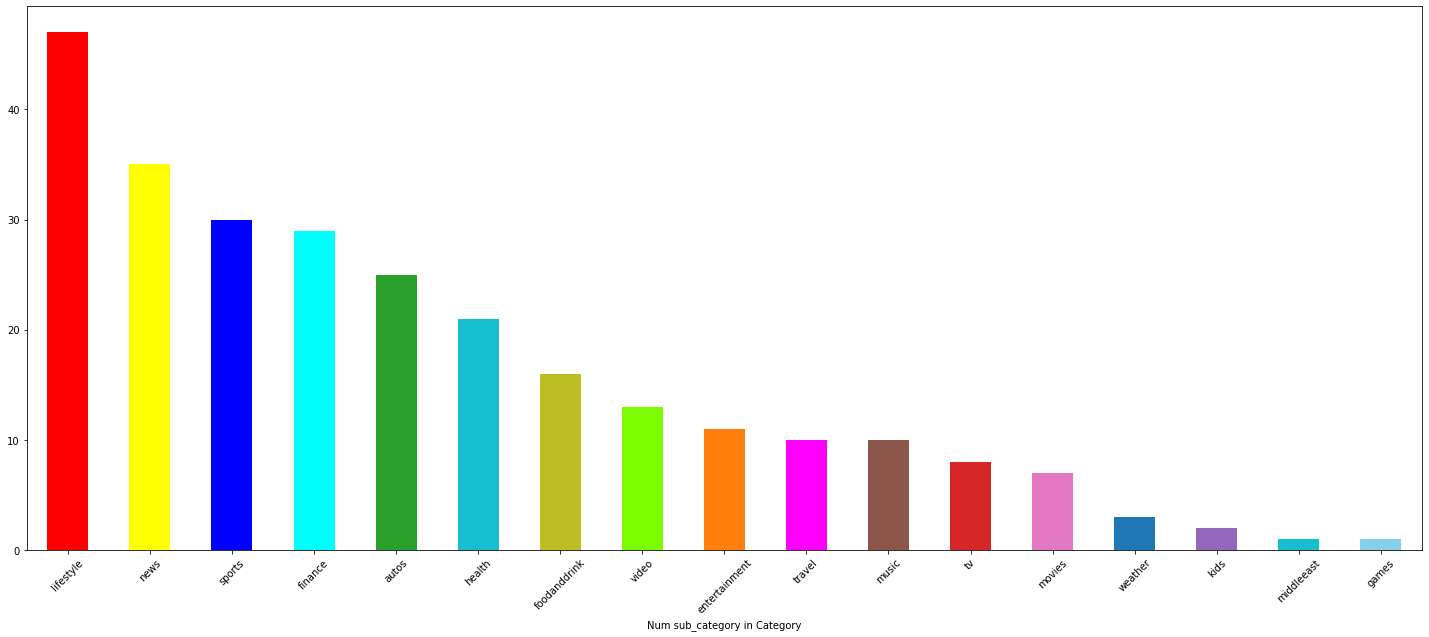

In [ ]:
plt.figure(figsize=(25,10))
pd.Series(count_cat).plot(kind = 'bar', color = my_color)
plt.xticks(rotation=45)
plt.xlabel('Num sub_category in Category')
plt.show()

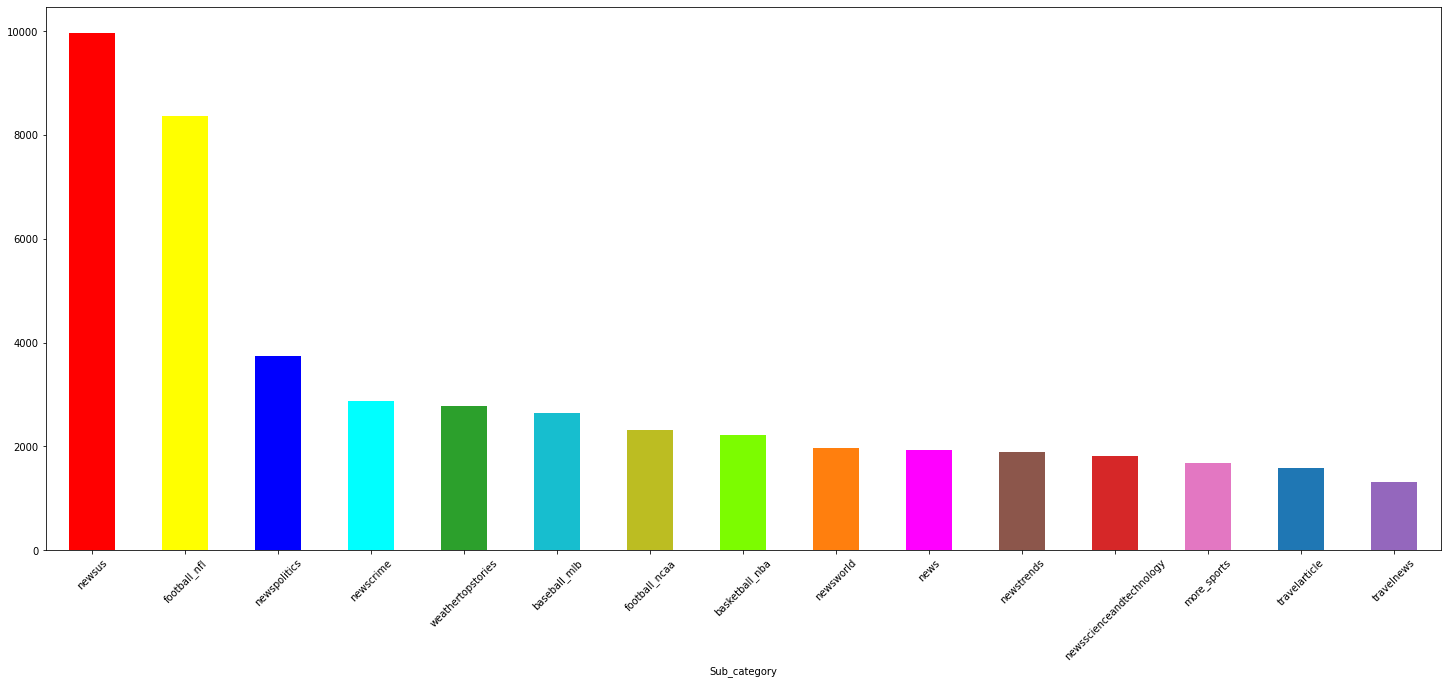

In [ ]:
plt.figure(figsize=(25,10))
news_dev['subcat'].value_counts()[:15].plot(kind='bar', color = my_color)
plt.xticks(rotation=45)
plt.xlabel('Sub_category')
plt.show()

In [ ]:
dict_len_title = {}
for x in tqdm(range(len(news_dev))):
  len_x_tmp = get_len(news_dev.loc[x,'title'])
  if(len_x_tmp in dict_len_title):
    dict_len_title[len_x_tmp] += 1
  else:
    dict_len_title[len_x_tmp] = 1

len_title = pd.DataFrame(sorted(dict_len_title.items()))

100%|██████████| 72023/72023 [00:00<00:00, 104655.33it/s]


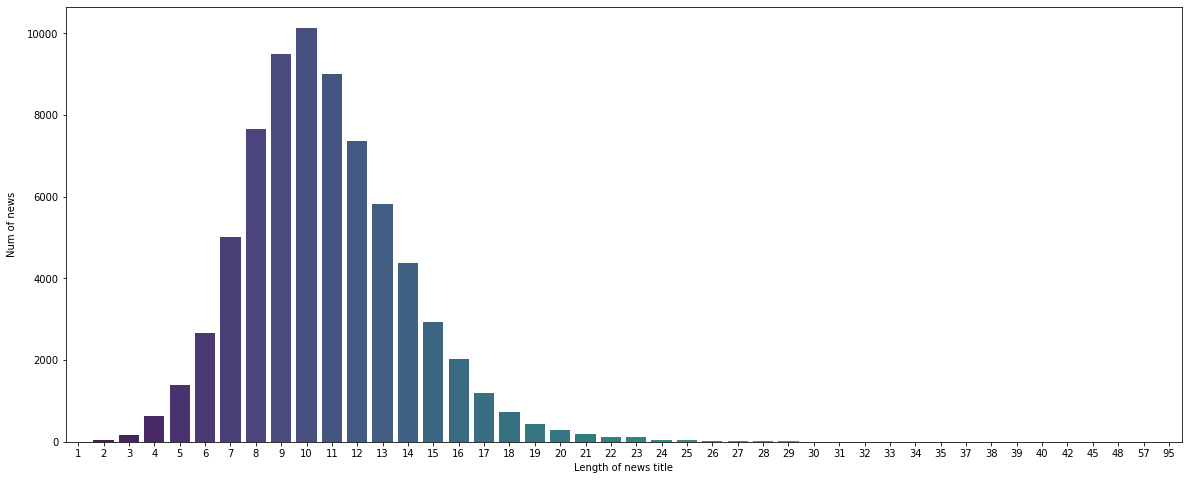

In [ ]:
#x1tmp, x2tmp = getxtick(list(len_title[0]),5)

plt.figure(figsize=(20,8))
sns.barplot(data = len_title, x = 0, y = 1 , palette='viridis')

#plt.xticks(x1tmp, x2tmp)
plt.xlabel('Length of news title')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
news_dev['abstract'].replace(np.NaN, '', inplace = True)

In [ ]:
dict_len_abstract = {}
for x in tqdm(range(len(news_dev))):
  len_x_tmp = get_len(news_dev.loc[x,'abstract'])
  if(len_x_tmp in dict_len_abstract):
    dict_len_abstract[len_x_tmp] += 1
  else:
    if(len_x_tmp > 100):
      if(100 in dict_len_abstract):
        dict_len_abstract[100] += 1
      else:
        dict_len_abstract[100] = 1
    else:
      dict_len_abstract[len_x_tmp] = 1

len_abstract = pd.DataFrame(sorted(dict_len_abstract.items()))

100%|██████████| 72023/72023 [00:00<00:00, 74607.15it/s]


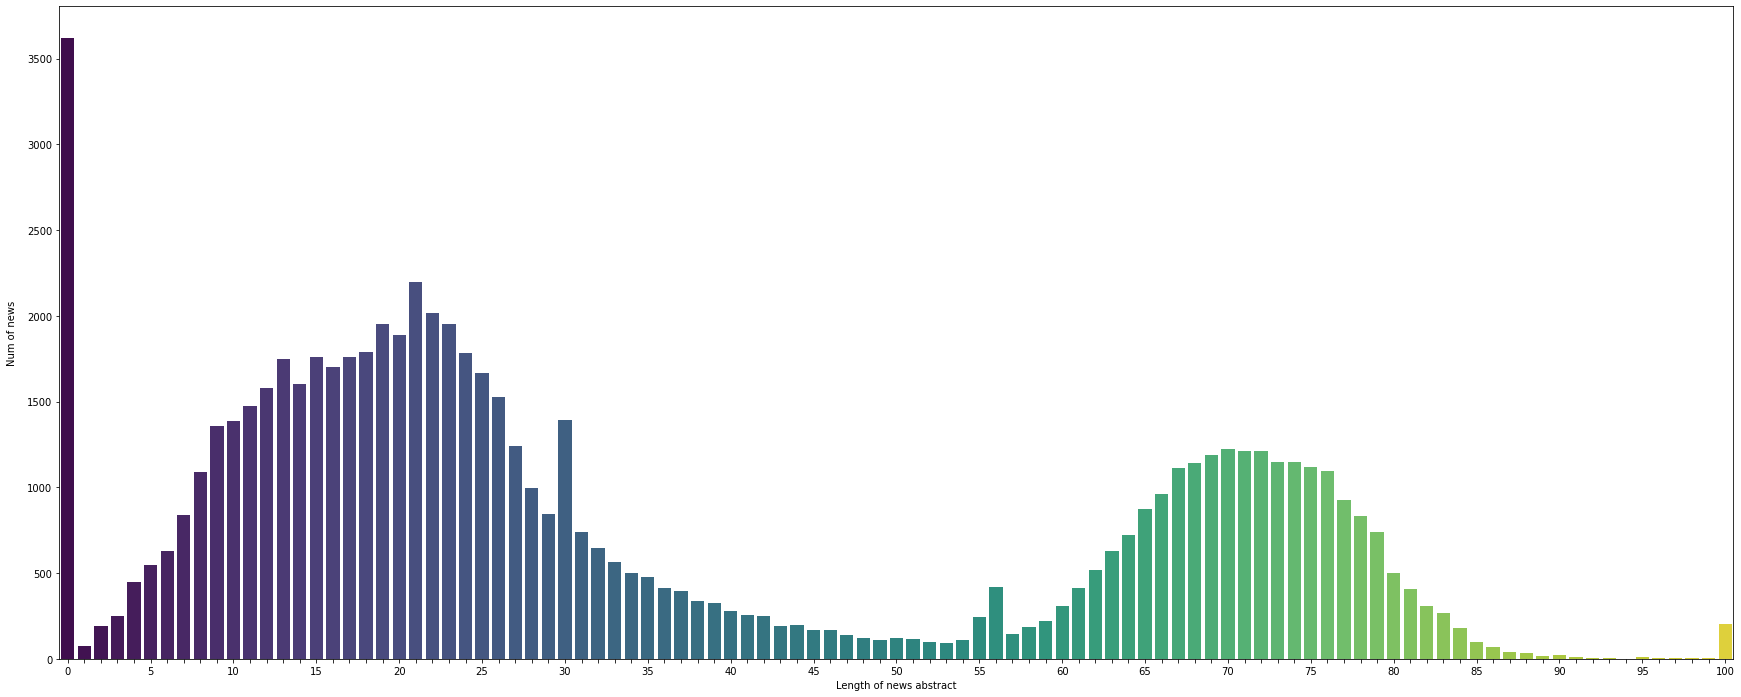

In [ ]:
x1tmp, x2tmp = getxtick(list(len_abstract[0]),5)

plt.figure(figsize=(30,12))
sns.barplot(data = len_abstract, x = 0, y = 1 , palette='viridis')

plt.xticks(x1tmp, x2tmp)
plt.xlabel('Length of news abstract')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
news_dev['title_entities'].replace(np.NaN, '[]', inplace = True)
df = list(news_dev['title_entities'])

count_tmp = {}

for x in tqdm(df):
  x = eval(x)  
  a = len(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 72023/72023 [00:01<00:00, 41585.37it/s]


 {0: 18736, 1: 29367, 2: 17185, 3: 5471, 4: 1045, 5: 179, 6: 27, 7: 9, 8: 2, 9: 2}


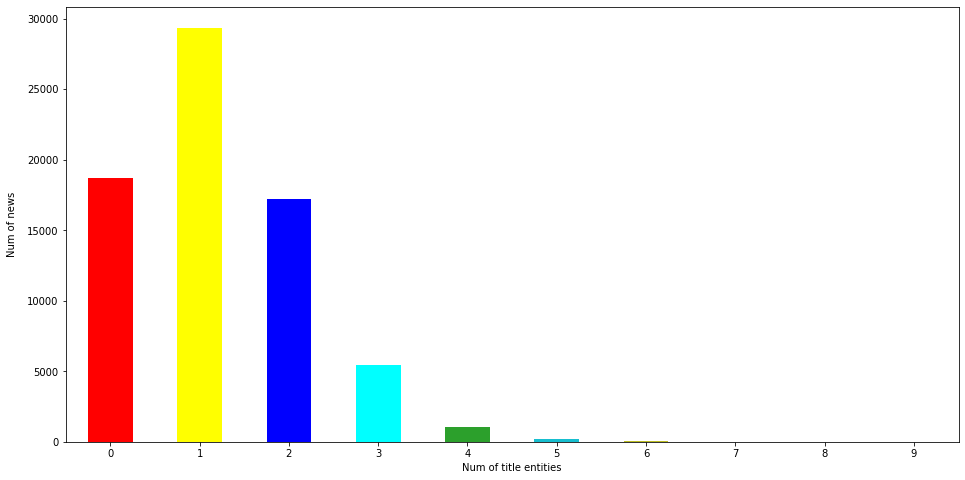

In [ ]:
plt.figure(figsize=(16,8))
pd.Series(count_tmp).plot(kind = 'bar', color = my_color)
plt.xticks(rotation=0)
plt.xlabel('Num of title entities')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
news_dev['abstract_entities'].replace(np.NaN, '[]', inplace = True)
df = list(news_dev['abstract_entities'])

count_tmp = {}

for x in tqdm(df):
  x = eval(x)  
  a = len(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 72023/72023 [00:02<00:00, 28351.87it/s]


 {0: 18680, 1: 17385, 2: 14050, 3: 9384, 4: 5721, 5: 3278, 6: 1858, 7: 861, 8: 413, 9: 199, 10: 79, 11: 51, 12: 28, 13: 11, 14: 9, 15: 5, 16: 5, 17: 3, 19: 1, 21: 1, 30: 1}


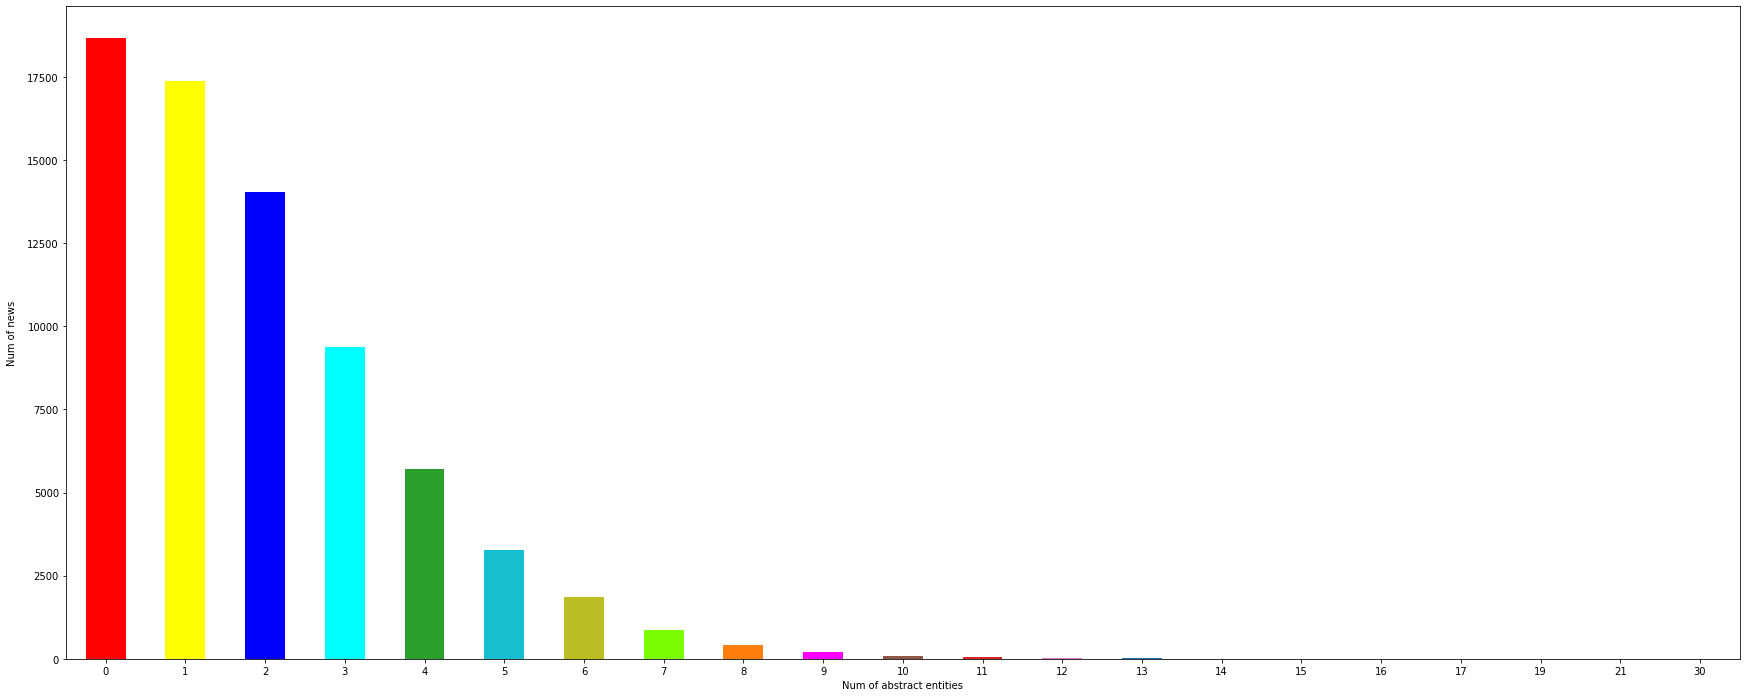

In [ ]:
plt.figure(figsize=(30,12))
pd.Series(count_tmp).plot(kind = 'bar', color = my_color)
plt.xticks(rotation=0)
plt.xlabel('Num of abstract entities')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
behaviors_dev.head()

,id,user,time,history,impression
0,1,U134050,11/15/2019 8:55:22 AM,N12246 N128820 N119226 N4065 N67770 N33446 N10...,N91737-0 N30206-0 N54368-0 N117802-0 N18190-0 ...
1,2,U254959,11/15/2019 11:42:35 AM,N34011 N9375 N67397 N7936 N118985 N109453 N103...,N119999-0 N24958-0 N104054-0 N33901-0 N9250-0 ...
2,3,U499841,11/15/2019 9:08:21 AM,N63858 N26834 N6379 N85484 N15229 N65119 N1047...,N18190-0 N89764-0 N91737-0 N54368-0 N49978-1 N...
3,4,U107107,11/15/2019 5:50:31 AM,N12959 N8085 N18389 N3758 N9740 N90543 N129790...,N122944-1 N18190-0 N55801-0 N59297-0 N128045-0...
4,5,U492344,11/15/2019 5:02:25 AM,N109183 N48453 N85005 N45706 N98923 N46069 N35...,N64785-0 N82503-0 N32993-0 N122944-0 N29160-0 ...


In [ ]:
for ft in behaviors_dev.columns:
    print(ft," : "," len: ",len(behaviors_dev[ft].unique()),'\n',behaviors_dev[ft].unique())

id  :   len:  376471 
 [     1      2      3 ... 376469 376470 376471]
user  :   len:  255990 
 ['U134050' 'U254959' 'U499841' ... 'U199558' 'U719484' 'U655194']
time  :   len:  67342 
 ['11/15/2019 8:55:22 AM' '11/15/2019 11:42:35 AM' '11/15/2019 9:08:21 AM'
 ... '11/15/2019 2:43:38 AM' '11/15/2019 6:41:21 PM'
 '11/15/2019 3:17:13 AM']
history  :   len:  246592 
 ['N12246 N128820 N119226 N4065 N67770 N33446 N103285 N99640 N106837 N76775 N129444 N120026 N115495 N86141 N98680 N108013 N121782 N30276 N93576 N123743 N48804 N79909 N68728 N71356 N102447 N33846 N83623 N97597 N59416 N1014 N20285'
 'N34011 N9375 N67397 N7936 N118985 N109453 N103181 N48553 N116768 N89398 N15899 N123743 N68431 N107520 N129836 N114848 N89408 N23264 N46584 N8527 N104737 N37061 N107264 N22534 N1118 N72976 N5992 N118081 N58653 N22281 N92868 N27384 N15961 N33127 N126112 N114571 N71643 N91597 N125961 N58020 N47362 N116734 N127283 N40765 N31079 N61869 N120031 N123548 N79547 N59836 N72626 N50536 N47589 N59280 N63807 N618

In [ ]:
for ft in behaviors_dev.columns:
    print(ft," : ",behaviors_dev[ft].isna().sum())

id  :  0
user  :  0
time  :  0
history  :  11270
impression  :  0


In [ ]:
df_nohis = behaviors_dev[behaviors_dev.history.isna()]

In [ ]:
print(df_nohis)

            id     user                   time history  \
27          28  U685983  11/15/2019 7:45:47 AM     NaN   
78          79   U36484  11/15/2019 1:56:56 PM     NaN   
98          99  U718224  11/15/2019 4:26:59 PM     NaN   
132        133  U242311  11/15/2019 6:12:35 AM     NaN   
198        199  U333832  11/15/2019 8:25:58 AM     NaN   
...        ...      ...                    ...     ...   
376242  376243  U707950  11/15/2019 1:05:35 PM     NaN   
376255  376256  U509424  11/15/2019 4:09:07 AM     NaN   
376336  376337  U359561  11/15/2019 7:26:52 AM     NaN   
376422  376423  U725809  11/15/2019 9:18:03 AM     NaN   
376443  376444  U422566  11/15/2019 6:42:31 AM     NaN   

                                               impression  
27      N120265-0 N21356-0 N32286-0 N92199-0 N126404-0...  
78      N110967-0 N56915-1 N83491-0 N130076-0 N42208-0...  
98      N2110-0 N107199-1 N46555-0 N21018-0 N28863-0 N...  
132     N80770-0 N104644-0 N82573-0 N128045-0 N72977-1...  
198

In [ ]:
len(df_nohis['user'].unique())

7017

In [ ]:
list_impression = list(df_nohis['impression'])

In [ ]:
print(len(list_impression))

11270


In [ ]:
df = list(behaviors_dev['time'])

count_tmp = {}

for x in tqdm(df):
  a = x.split('/')
  if(a[1] in count_tmp):
    count_tmp[a[1]] += 1
  else:
    count_tmp[a[1]] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 376471/376471 [00:00<00:00, 1512512.03it/s]


 {'15': 376471}


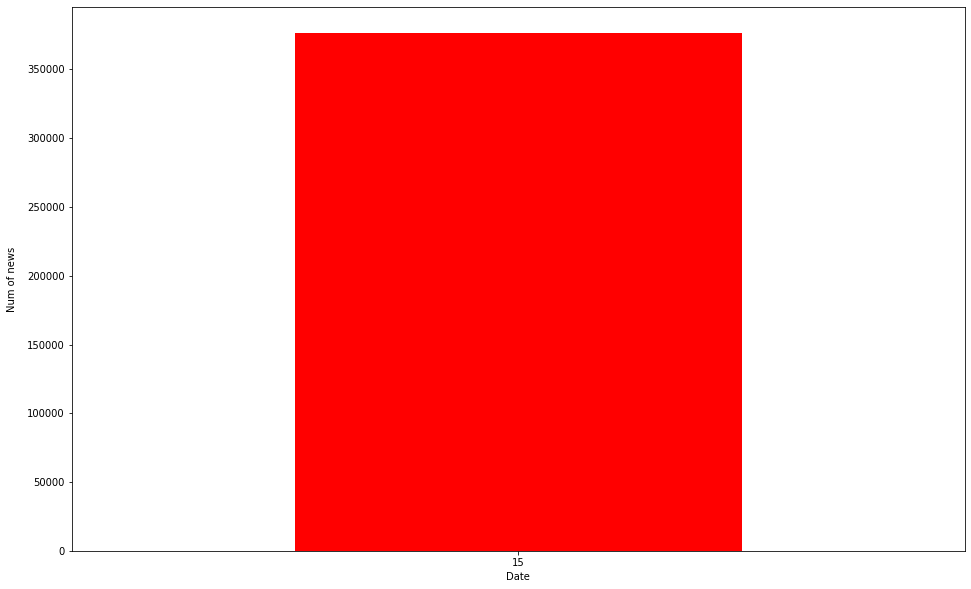

In [ ]:
plt.figure(figsize=(16,10))
pd.Series(count_tmp).plot(kind = 'bar', color = my_color)
plt.xticks(rotation=0)
plt.xlabel('Date')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
df = list(behaviors_dev['time'])

count_tmp = {}

for x in tqdm(df):
  a = get_hour(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 376471/376471 [00:00<00:00, 977129.12it/s]


 {0: 2720, 1: 2998, 2: 4922, 3: 9022, 4: 15727, 5: 25885, 6: 31780, 7: 33527, 8: 35563, 9: 33530, 10: 31982, 11: 31304, 12: 30850, 13: 27012, 14: 19447, 15: 16469, 16: 7739, 17: 4237, 18: 3225, 19: 2587, 20: 2151, 21: 1668, 22: 1251, 23: 875}


In [ ]:
for x in range(24):
  print("'",x,"h-",x+1,"h',",sep='',end='')

'0h-1h','1h-2h','2h-3h','3h-4h','4h-5h','5h-6h','6h-7h','7h-8h','8h-9h','9h-10h','10h-11h','11h-12h','12h-13h','13h-14h','14h-15h','15h-16h','16h-17h','17h-18h','18h-19h','19h-20h','20h-21h','21h-22h','22h-23h','23h-24h',

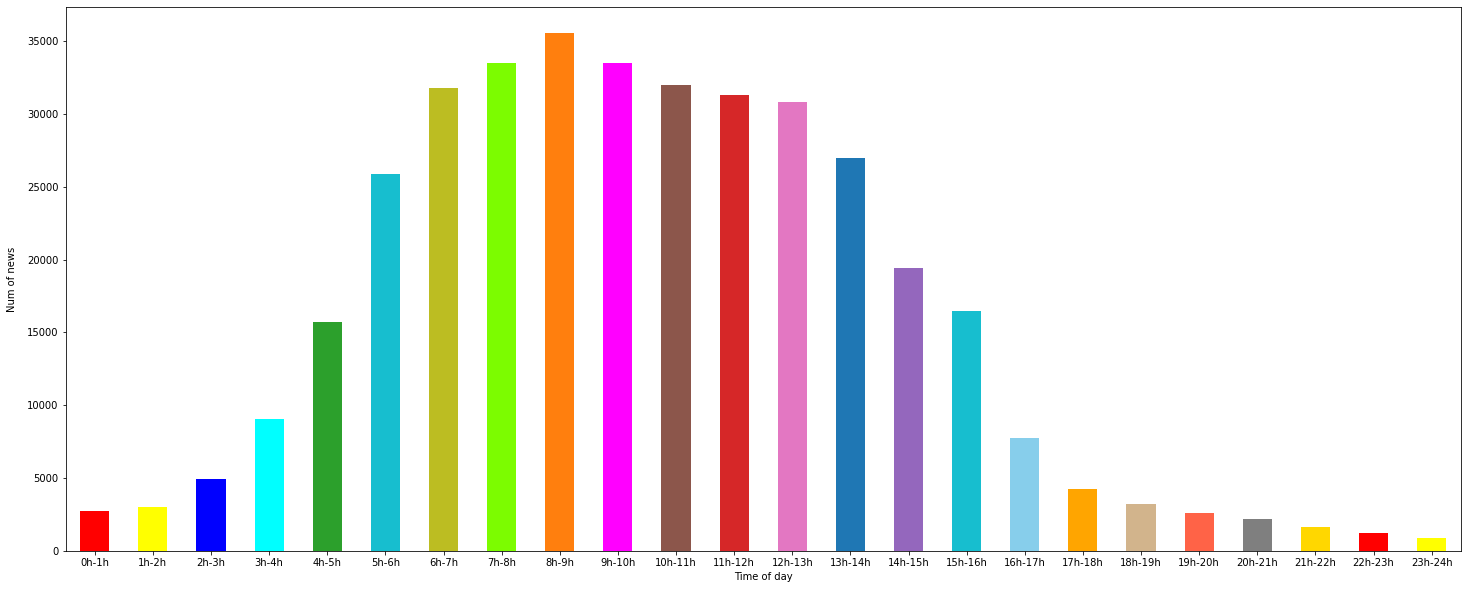

In [ ]:
plt.figure(figsize=(25,10))
pd.Series(count_tmp).plot(kind = 'bar', color = my_color)
plt.xticks(rotation=0)
plt.xticks(list(np.arange(0,24,1)),['0h-1h','1h-2h','2h-3h','3h-4h','4h-5h',
                                    '5h-6h','6h-7h','7h-8h','8h-9h','9h-10h',
                                    '10h-11h','11h-12h','12h-13h','13h-14h',
                                    '14h-15h','15h-16h','16h-17h','17h-18h',
                                    '18h-19h','19h-20h','20h-21h','21h-22h',
                                    '22h-23h','23h-24h'])
plt.xlabel('Time of day')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
df = list(behaviors_dev['user'])

df_u = list(behaviors_dev['user'].unique())

In [ ]:
print(len(df))
print(len(df_u))

cnt_user = {}

for x in df:
  if(x in cnt_user):
    cnt_user[x] += 1
  else:
    cnt_user[x] = 1

376471
255990


In [ ]:
cnt_user_f = {}

for x in cnt_user.values():
  if(x in cnt_user_f):
    cnt_user_f[x] += 1
  else:
    cnt_user_f[x] = 1

cnt_user_f = dict(sorted(cnt_user_f.items()))

print(cnt_user_f)

{1: 179383, 2: 50607, 3: 15985, 4: 5811, 5: 2347, 6: 1001, 7: 444, 8: 182, 9: 110, 10: 57, 11: 24, 12: 9, 13: 15, 14: 4, 15: 6, 16: 2, 18: 1, 20: 1, 27: 1}


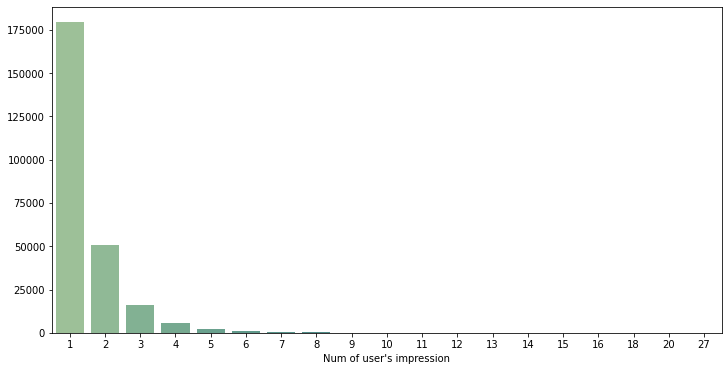

In [ ]:
cnt_user_f_tmp = pd.DataFrame(cnt_user_f.items())

plt.figure(figsize=(12,6))
sns.barplot(data = cnt_user_f_tmp, x = 0, y = 1 , palette='crest')
plt.xlabel("Num of user's impression")
plt.ylabel('')
plt.show()

In [ ]:
behaviors_dev.replace(np.NaN, '', inplace = True)
df = list(behaviors_dev['history'])

count_tmp = {}

for x in tqdm(df):
  a = get_len(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 376471/376471 [00:02<00:00, 157819.39it/s]


 {0: 11270, 1: 5478, 2: 8940, 3: 12755, 4: 14281, 5: 13808, 6: 13111, 7: 12145, 8: 11229, 9: 10715, 10: 9759, 11: 9311, 12: 8741, 13: 8446, 14: 8039, 15: 7540, 16: 7174, 17: 6840, 18: 6391, 19: 6092, 20: 5835, 21: 5575, 22: 5402, 23: 5307, 24: 5020, 25: 4799, 26: 4499, 27: 4382, 28: 4435, 29: 4072, 30: 3969, 31: 3757, 32: 3534, 33: 3482, 34: 3297, 35: 3478, 36: 3060, 37: 3110, 38: 2894, 39: 3061, 40: 2635, 41: 2730, 42: 2732, 43: 2596, 44: 2252, 45: 2415, 46: 2331, 47: 2185, 48: 2185, 49: 2181, 50: 2182, 51: 2011, 52: 1953, 53: 1921, 54: 1762, 55: 1591, 56: 1599, 57: 1599, 58: 1537, 59: 1482, 60: 1499, 61: 1464, 62: 1392, 63: 1266, 64: 1314, 65: 1239, 66: 1141, 67: 1183, 68: 1159, 69: 1117, 70: 1106, 71: 1038, 72: 1063, 73: 1019, 74: 944, 75: 988, 76: 984, 77: 960, 78: 865, 79: 924, 80: 946, 81: 916, 82: 798, 83: 742, 84: 768, 85: 698, 86: 687, 87: 711, 88: 612, 89: 606, 90: 633, 91: 657, 92: 589, 93: 646, 94: 605, 95: 555, 96: 651, 97: 559, 98: 576, 99: 528, 100: 513, 101: 541, 102: 

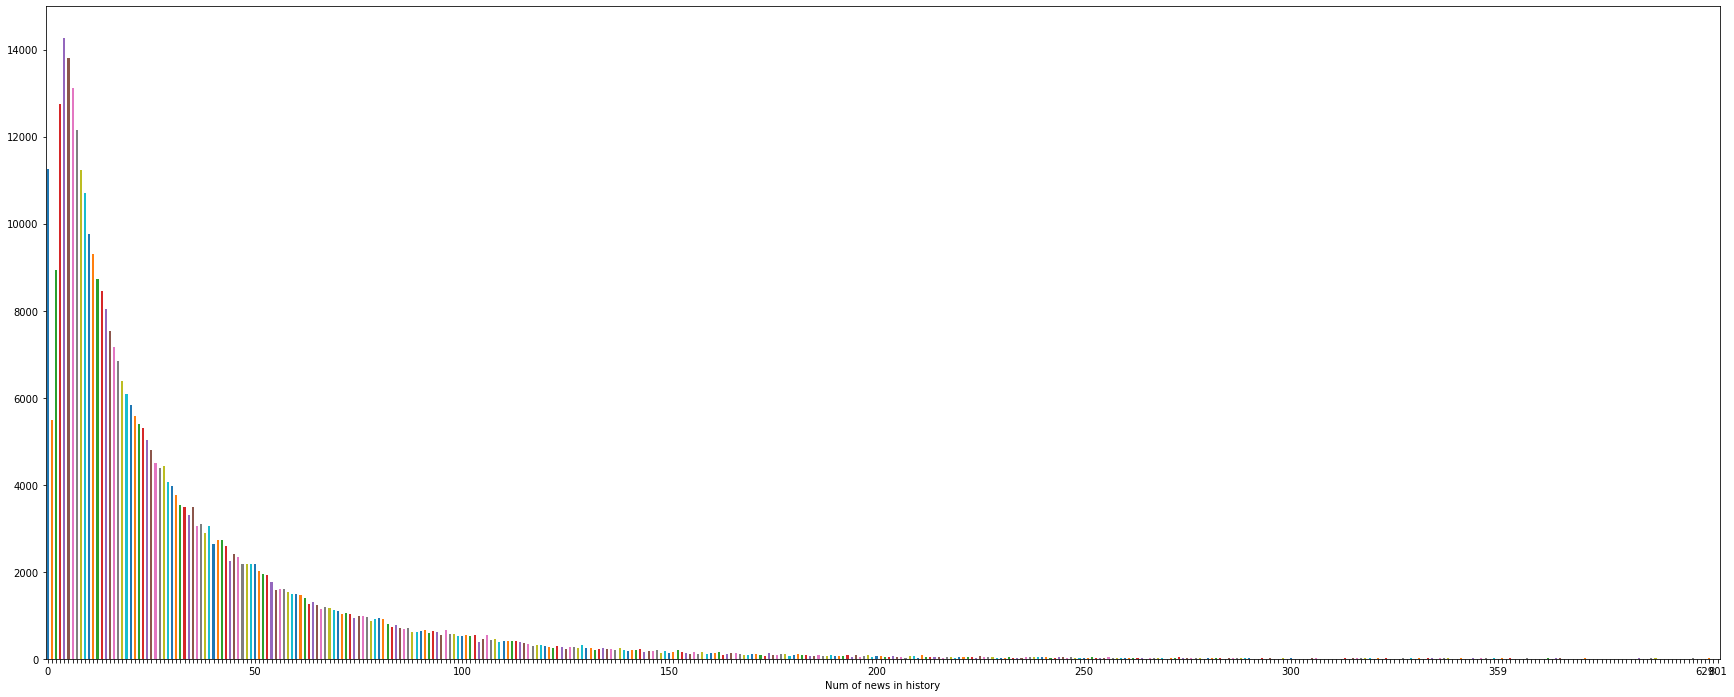

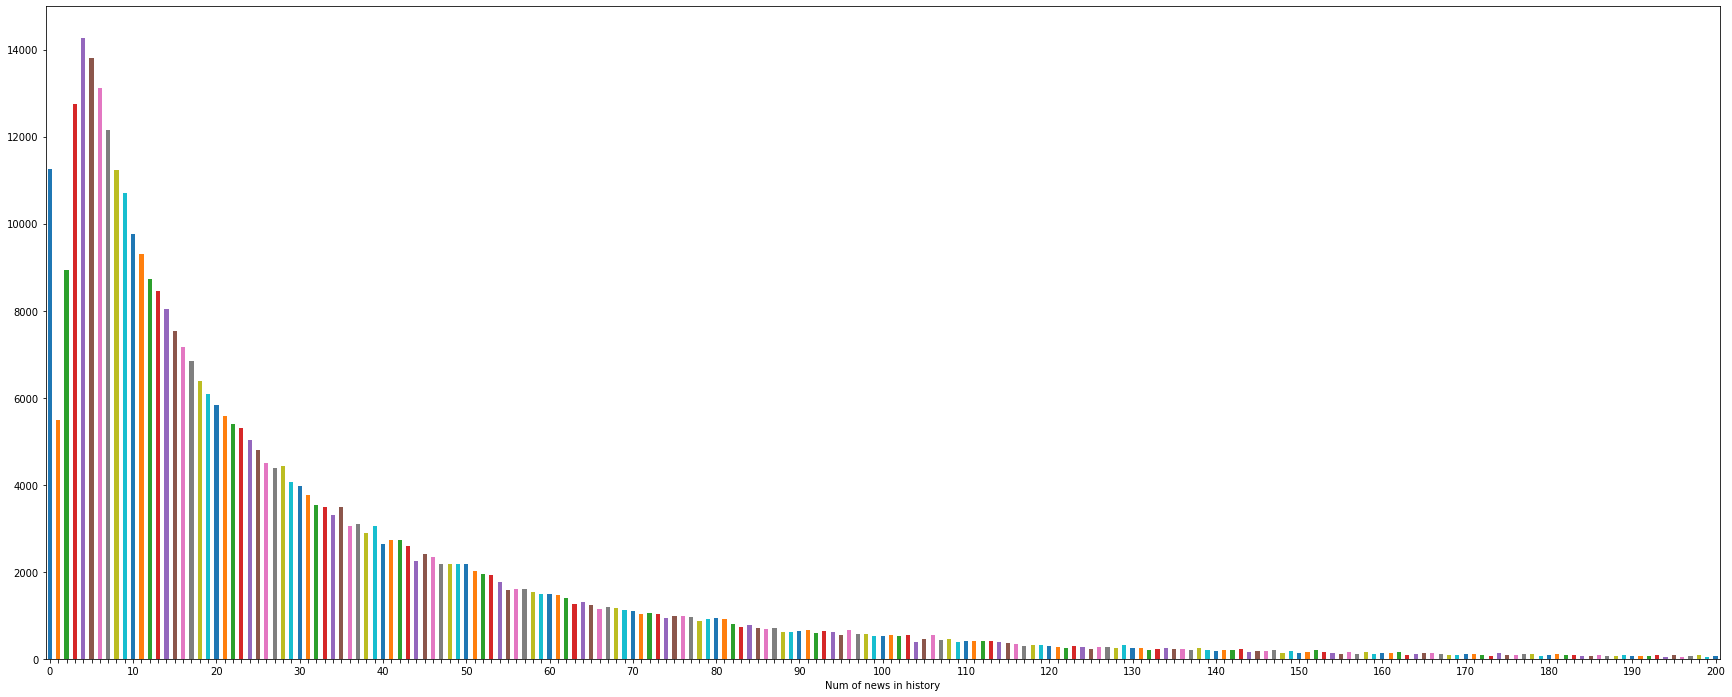

In [ ]:
x1tmp, x2tmp = getxtick(list(count_tmp),50)

plt.figure(figsize=(30,12))
pd.Series(count_tmp).loc[:].plot(kind = 'bar', color = mcolors.TABLEAU_COLORS)
plt.xticks(x1tmp, x2tmp, rotation = 0)
plt.xlabel('Num of news in history')
plt.show()



x1tmp, x2tmp = getxtick(list(count_tmp)[:201],10)

plt.figure(figsize=(30,12))
pd.Series(count_tmp).loc[:200].plot(kind = 'bar', color = mcolors.TABLEAU_COLORS)
plt.xticks(x1tmp, x2tmp, rotation = 0)
plt.xlabel('Num of news in history')
plt.show()

In [ ]:
df = list(behaviors_dev['impression'])
print(len(df))

count_tmp = {}

for x in tqdm(df):
  a = get_len(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

376471


100%|██████████| 376471/376471 [00:02<00:00, 139697.35it/s]


 {2: 20126, 3: 2509, 4: 10704, 5: 11229, 6: 5047, 7: 21085, 8: 6080, 9: 5200, 10: 12416, 11: 13090, 12: 11158, 13: 7886, 14: 10203, 15: 3931, 16: 4878, 17: 10877, 18: 3736, 19: 6442, 20: 7725, 21: 3984, 22: 8869, 23: 4770, 24: 3048, 25: 4646, 26: 6563, 27: 4930, 28: 5683, 29: 3394, 30: 3712, 31: 3159, 32: 5104, 33: 2998, 34: 3235, 35: 3656, 36: 2517, 37: 3455, 38: 3448, 39: 2338, 40: 2187, 41: 2865, 42: 3124, 43: 2919, 44: 2931, 45: 1885, 46: 2020, 47: 2321, 48: 2672, 49: 2728, 50: 2265, 51: 1990, 52: 1645, 53: 1849, 54: 2115, 55: 2178, 56: 1806, 57: 1723, 58: 1530, 59: 1689, 60: 1783, 61: 1921, 62: 1539, 63: 1448, 64: 1448, 65: 1552, 66: 1691, 67: 1602, 68: 1350, 69: 1374, 70: 1295, 71: 1298, 72: 1399, 73: 1424, 74: 1160, 75: 1237, 76: 1341, 77: 1093, 78: 1183, 79: 1327, 80: 993, 81: 1075, 82: 1074, 83: 992, 84: 1037, 85: 1108, 86: 948, 87: 941, 88: 884, 89: 864, 90: 889, 91: 869, 92: 937, 93: 801, 94: 839, 95: 818, 96: 763, 97: 771, 98: 805, 99: 824, 100: 761, 101: 732, 102: 703, 10

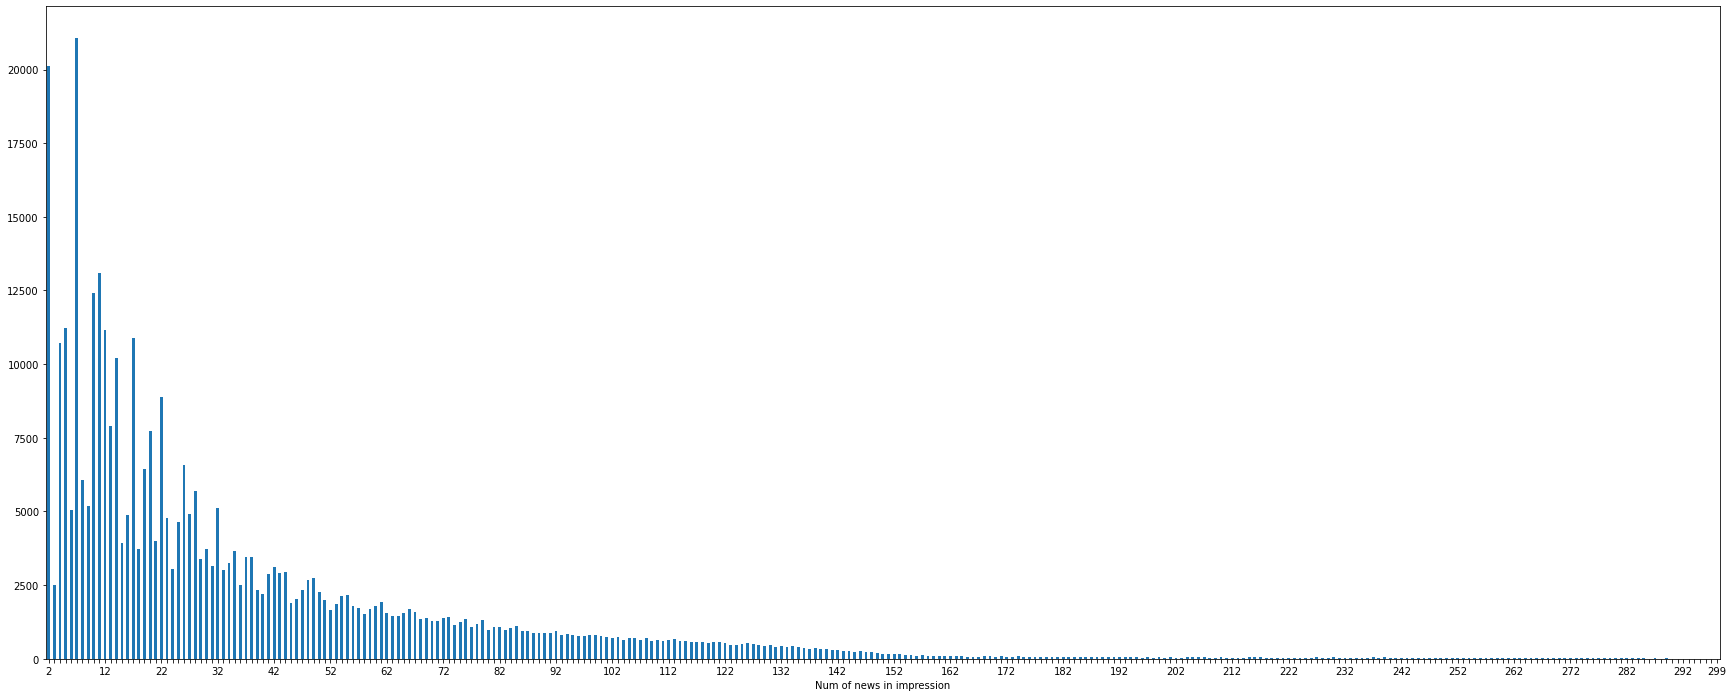

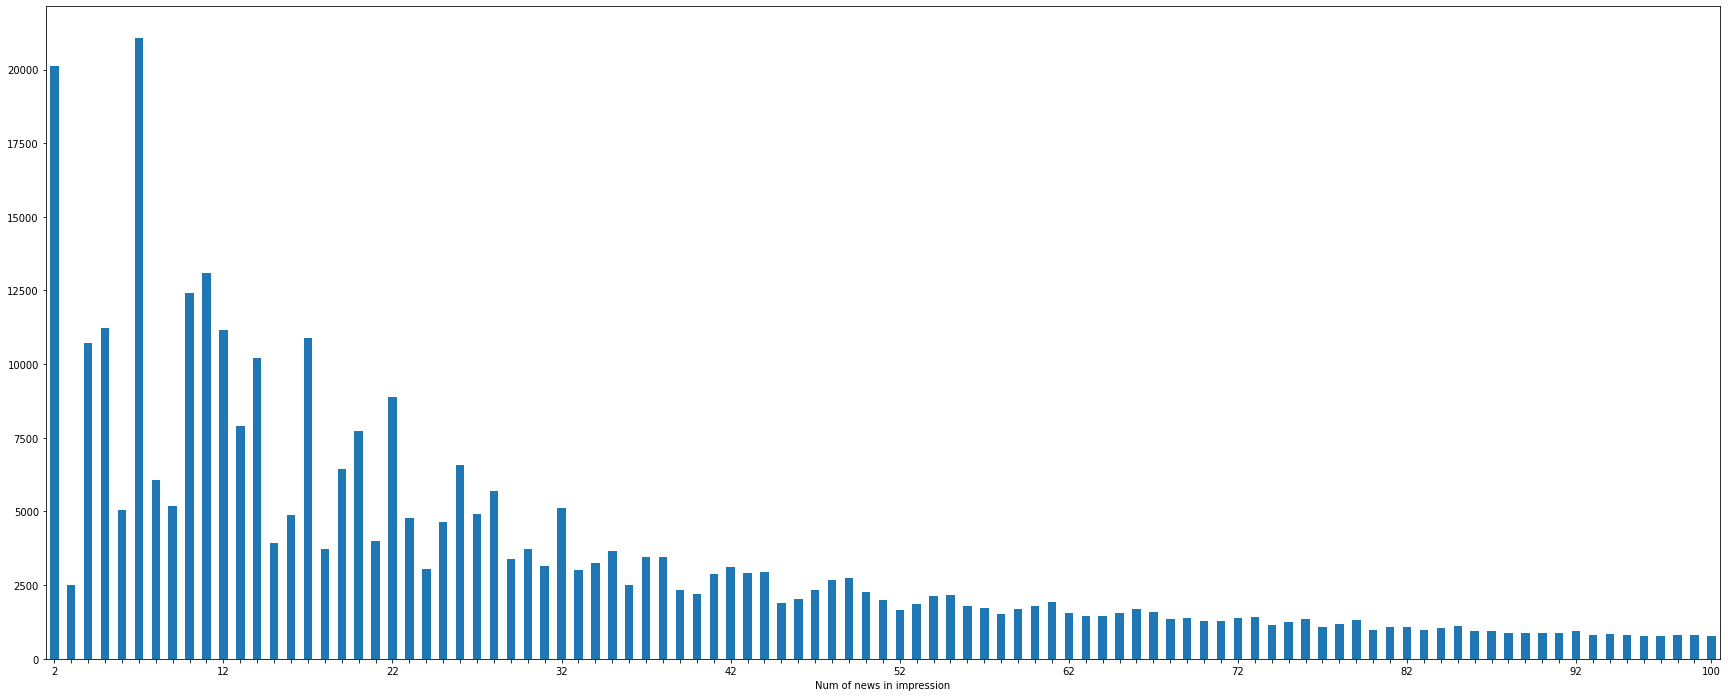

In [ ]:
x1tmp, x2tmp = getxtick(list(count_tmp),10)

plt.figure(figsize=(30,12))
pd.Series(count_tmp).plot(kind = 'bar')
plt.xticks(x1tmp, x2tmp, rotation=0)
plt.xlabel('Num of news in impression')
plt.show()


x1tmp, x2tmp = getxtick(list(count_tmp)[:99],10)

plt.figure(figsize=(30,12))
pd.Series(count_tmp).loc[:100].plot(kind = 'bar')
plt.xticks(x1tmp, x2tmp, rotation=0)
plt.xlabel('Num of news in impression')
plt.show()


In [ ]:
count_tmp = {}

for x in tqdm(df):
  a = get_num_click(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 376471/376471 [00:04<00:00, 78089.83it/s]


 {1: 268356, 2: 64564, 3: 23105, 4: 9833, 5: 4747, 6: 2413, 7: 1343, 8: 783, 9: 447, 10: 310, 11: 188, 12: 126, 13: 65, 14: 52, 15: 33, 16: 30, 17: 21, 18: 11, 19: 8, 20: 8, 21: 8, 22: 3, 23: 3, 24: 3, 25: 1, 26: 1, 27: 2, 29: 1, 31: 2, 35: 1, 36: 1, 37: 1, 39: 1}


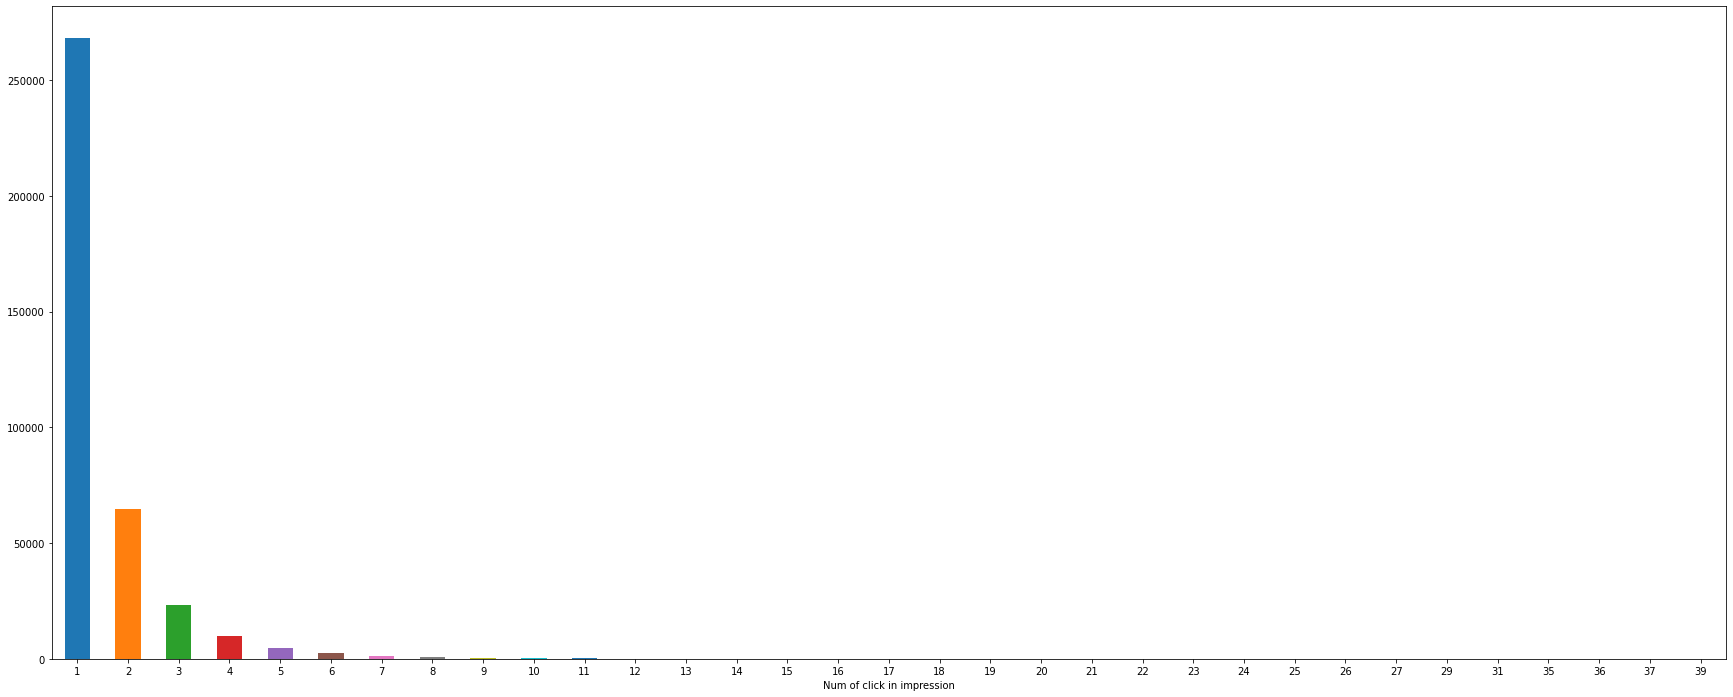

In [ ]:
plt.figure(figsize=(30,12))
pd.Series(count_tmp).loc[:].plot(kind = 'bar', color = mcolors.TABLEAU_COLORS)
plt.xticks(rotation=0)
plt.xlabel('Num of click in impression')
plt.show()

In [ ]:
count_tmp = {}

for x in tqdm(df):
  a = get_len(x)
  b = get_num_click(x)
  if(a in count_tmp):
    if(b in count_tmp[a]):
      count_tmp[a][b] += 1
    else:
      count_tmp[a][b] = 1
  else:
    count_tmp[a] = {}   
    count_tmp[a][b] = 1   

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 376471/376471 [00:08<00:00, 46471.50it/s]


 {2: {1: 20126}, 3: {1: 2486, 2: 23}, 4: {1: 10493, 2: 208, 3: 3}, 5: {1: 10877, 2: 345, 3: 6, 4: 1}, 6: {1: 4812, 2: 227, 3: 7, 4: 1}, 7: {1: 19372, 2: 1612, 3: 94, 4: 6, 5: 1}, 8: {1: 5505, 2: 527, 3: 44, 4: 3, 5: 1}, 9: {1: 4626, 2: 507, 3: 62, 5: 3, 4: 2}, 10: {2: 1539, 1: 10591, 3: 236, 4: 41, 5: 7, 6: 2}, 11: {1: 11211, 3: 224, 2: 1622, 4: 28, 5: 2, 6: 3}, 12: {1: 9294, 2: 1560, 3: 267, 4: 29, 5: 8}, 13: {2: 1223, 1: 6397, 3: 206, 4: 49, 5: 10, 7: 1}, 14: {1: 8106, 2: 1692, 3: 332, 4: 55, 5: 13, 6: 4, 7: 1}, 15: {1: 3127, 3: 116, 2: 655, 4: 25, 5: 5, 6: 3}, 16: {1: 3920, 2: 766, 4: 41, 3: 143, 5: 7, 7: 1}, 17: {2: 1949, 4: 111, 1: 8333, 3: 444, 5: 28, 6: 10, 7: 1, 8: 1}, 18: {1: 2901, 2: 642, 3: 147, 4: 36, 5: 8, 7: 1, 6: 1}, 19: {1: 4855, 2: 1203, 3: 279, 4: 76, 5: 22, 7: 1, 6: 5, 9: 1}, 20: {2: 1459, 1: 5751, 3: 382, 4: 90, 5: 33, 7: 5, 6: 5}, 21: {1: 2913, 2: 802, 3: 208, 4: 44, 6: 6, 5: 10, 7: 1}, 22: {1: 6385, 2: 1769, 3: 495, 4: 155, 5: 44, 6: 15, 7: 4, 8: 2}, 23: {1: 3427

In [ ]:
sum = 0.0
click = 0.0
for x in count_tmp:
  for y in count_tmp[x]:
    sum += count_tmp[x][y]*x
    click += y*count_tmp[x][y]

print(click,sum)
print(click/sum*100)

574845.0 14085557.0
4.081095266591161


**PROCESS TEST FILE**

---

In [ ]:
news_test.head()

,news,category,subcat,title,abstract,url,title_entities,abstract_entities
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,https://assets.msn.com/labs/mind/AABmf2I.html,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ..."
2,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
3,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
4,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."


In [ ]:
news_test.describe()

,news,category,subcat,title,abstract,url,title_entities,abstract_entities
count,120959,120959,120959,120959,114256,120958,120953,120950
unique,120959,18,290,117306,109113,120956,79337,85928
top,N88753,sports,newsus,Powerball Winning Numbers For 10/26/2019 Drawi...,What's the weather today? What's the weather f...,[],[],[]
freq,1,38006,17496,26,518,3,30948,30372


In [ ]:
for ft in news_test.columns:
    print(ft," : "," len: ",len(news_test[ft].unique()),'\n',news_test[ft].unique())

news  :   len:  120959 
 ['N88753' 'N45436' 'N23144' ... 'N108404' 'N74617' 'N56840']
category  :   len:  18 
 ['lifestyle' 'news' 'health' 'sports' 'weather' 'entertainment'
 'foodanddrink' 'autos' 'travel' 'video' 'finance' 'tv' 'movies' 'music'
 'kids' 'middleeast' 'games' 'northamerica']
subcat  :   len:  290 
 ['lifestyleroyals' 'newsscienceandtechnology' 'weightloss' 'medical'
 'newsworld' 'voices' 'cardio' 'football_nfl' 'weathertopstories' 'gaming'
 'recipes' 'lifestylelovesex' 'nutrition' 'autosenthusiasts' 'autossports'
 'tipsandtricks' 'wellness' 'health-news' 'celebrity' 'travelarticle'
 'autossuvs' 'newspolitics' 'traveltripideas' 'animals' 'autosnews'
 'newsbusiness' 'quickandeasy' 'finance-insurance' 'golf' 'newstrends'
 'lifestylepetsanimals' 'football_ncaa' 'news' 'lifestylebuzz' 'mma'
 'fitness' 'newsus' 'tv-gallery' 'tvnews' 'basketball_nba' 'shop-all'
 'newsphotos' 'lifestylemindandsoul' 'travelnews' 'basketball_ncaa'
 'finance-real-estate' 'tv-celebrity' 'financene

In [ ]:
for ft in news_test.columns:
    print(ft," : ",news_test[ft].isna().sum())

news  :  0
category  :  0
subcat  :  0
title  :  0
abstract  :  6703
url  :  1
title_entities  :  6
abstract_entities  :  9


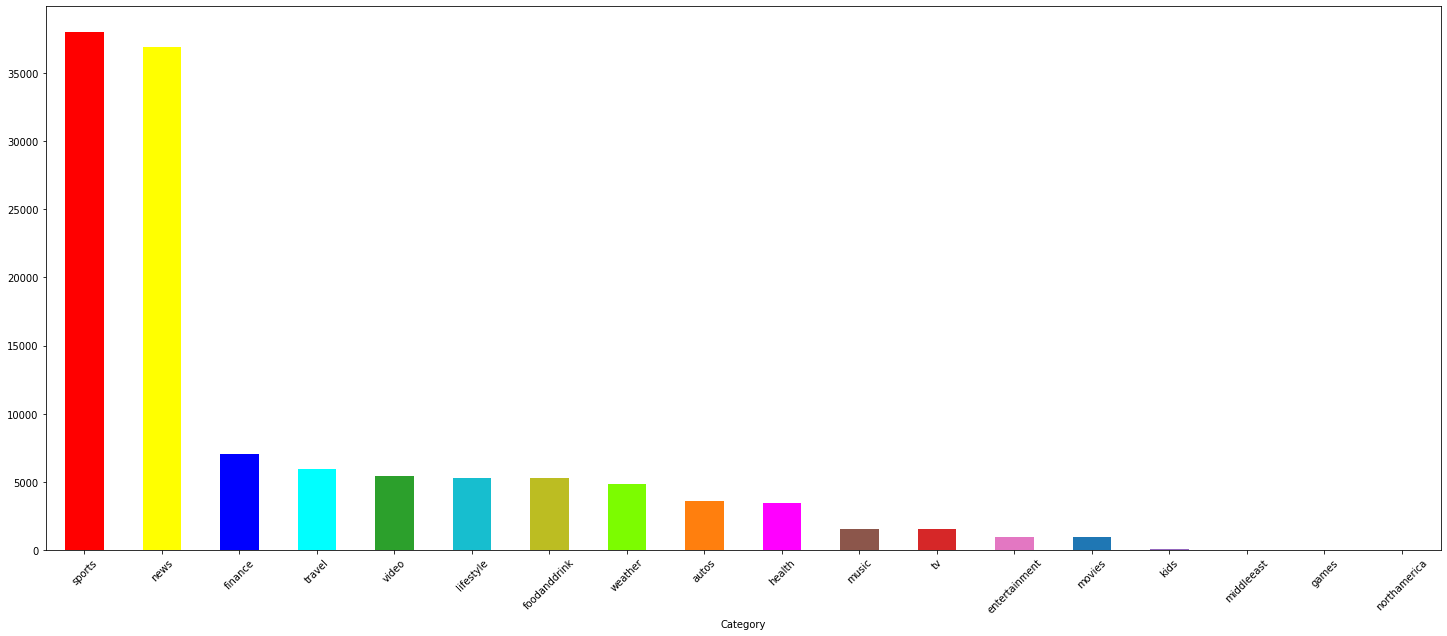

In [ ]:
plt.figure(figsize=(25,10))
news_test['category'].value_counts().plot(kind='bar', color = my_color)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.show()

In [ ]:
dict_subcat = {}
for x in tqdm(range(len(news_test))):
  if(not news_test.loc[x,'subcat'] in dict_subcat):
    dict_subcat[news_test.loc[x,'subcat']] = news_test.loc[x,'category']

dict_cat = {}
for x in dict_subcat:
  if (dict_subcat[x] in dict_cat):
    dict_cat[dict_subcat[x]].append(x)
  else:
    dict_cat[dict_subcat[x]] = [x]

100%|██████████| 120959/120959 [00:00<00:00, 155222.87it/s]


In [ ]:
count_cat = {}
for x in dict_cat:
  count_cat[x] = len(dict_cat[x])
count_cat = dict(sorted(count_cat.items(), key=lambda x: x[1], reverse = True))
print(count_cat)

{'lifestyle': 51, 'news': 36, 'sports': 33, 'finance': 32, 'autos': 25, 'health': 22, 'foodanddrink': 17, 'video': 15, 'entertainment': 13, 'travel': 12, 'music': 11, 'tv': 9, 'movies': 7, 'weather': 2, 'kids': 2, 'middleeast': 1, 'games': 1, 'northamerica': 1}


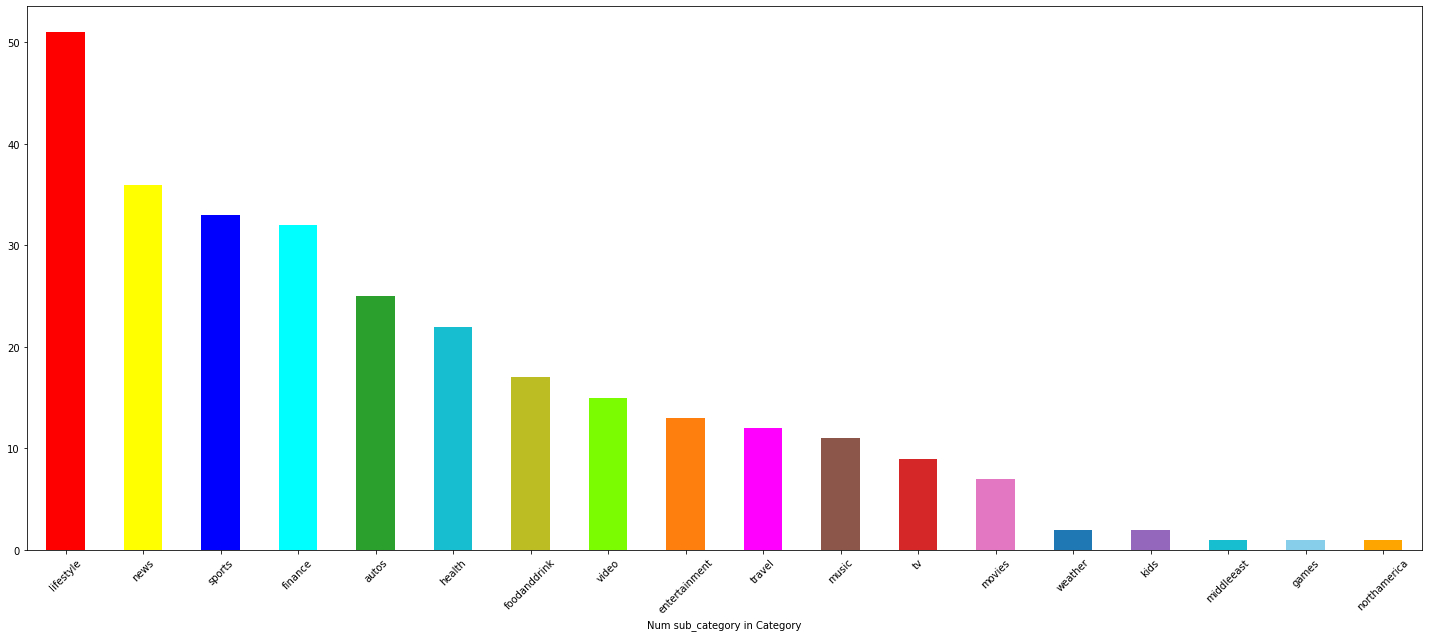

In [ ]:
plt.figure(figsize=(25,10))
pd.Series(count_cat).plot(kind = 'bar', color = my_color)
plt.xticks(rotation=45)
plt.xlabel('Num sub_category in Category')
plt.show()

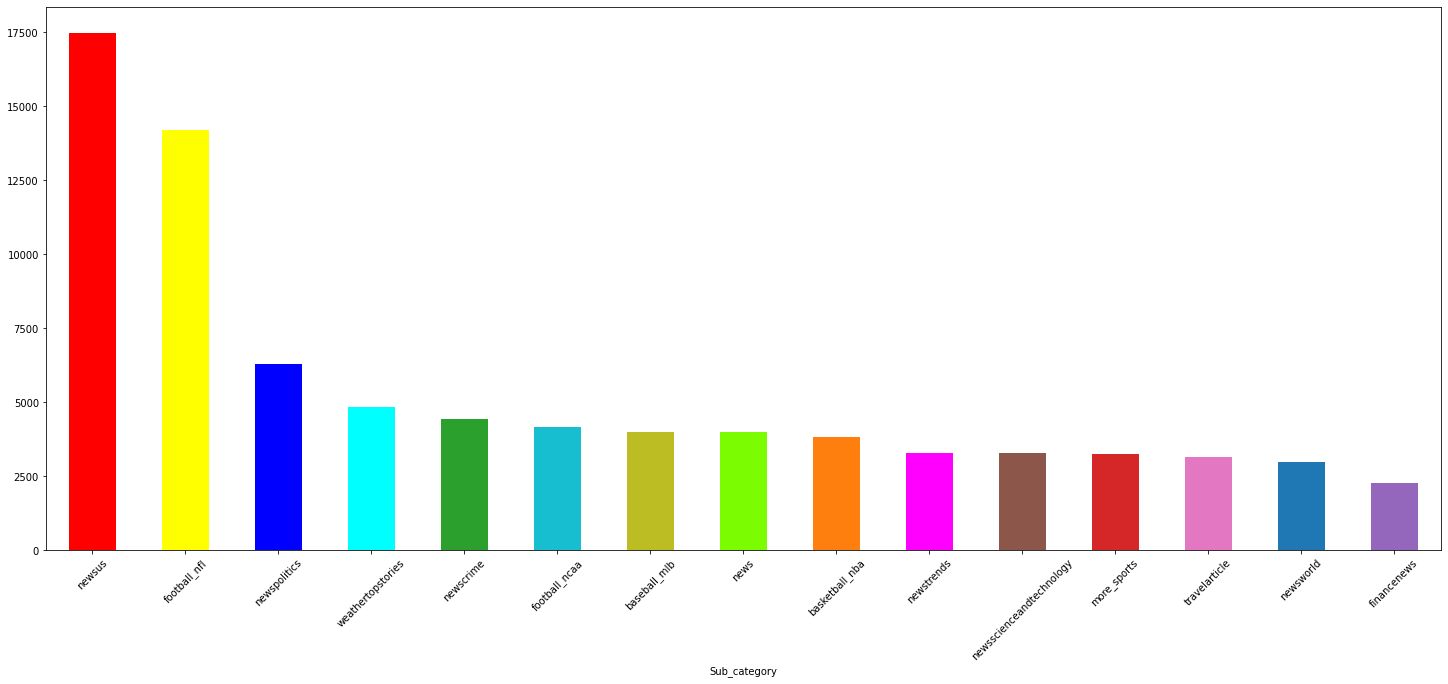

In [ ]:
plt.figure(figsize=(25,10))
news_test['subcat'].value_counts()[:15].plot(kind='bar', color = my_color)
plt.xticks(rotation=45)
plt.xlabel('Sub_category')
plt.show()

In [ ]:
dict_len_title = {}
for x in tqdm(range(len(news_test))):
  len_x_tmp = get_len(news_test.loc[x,'title'])
  if(len_x_tmp in dict_len_title):
    dict_len_title[len_x_tmp] += 1
  else:
    dict_len_title[len_x_tmp] = 1

len_title = pd.DataFrame(sorted(dict_len_title.items()))

100%|██████████| 120959/120959 [00:01<00:00, 110311.31it/s]


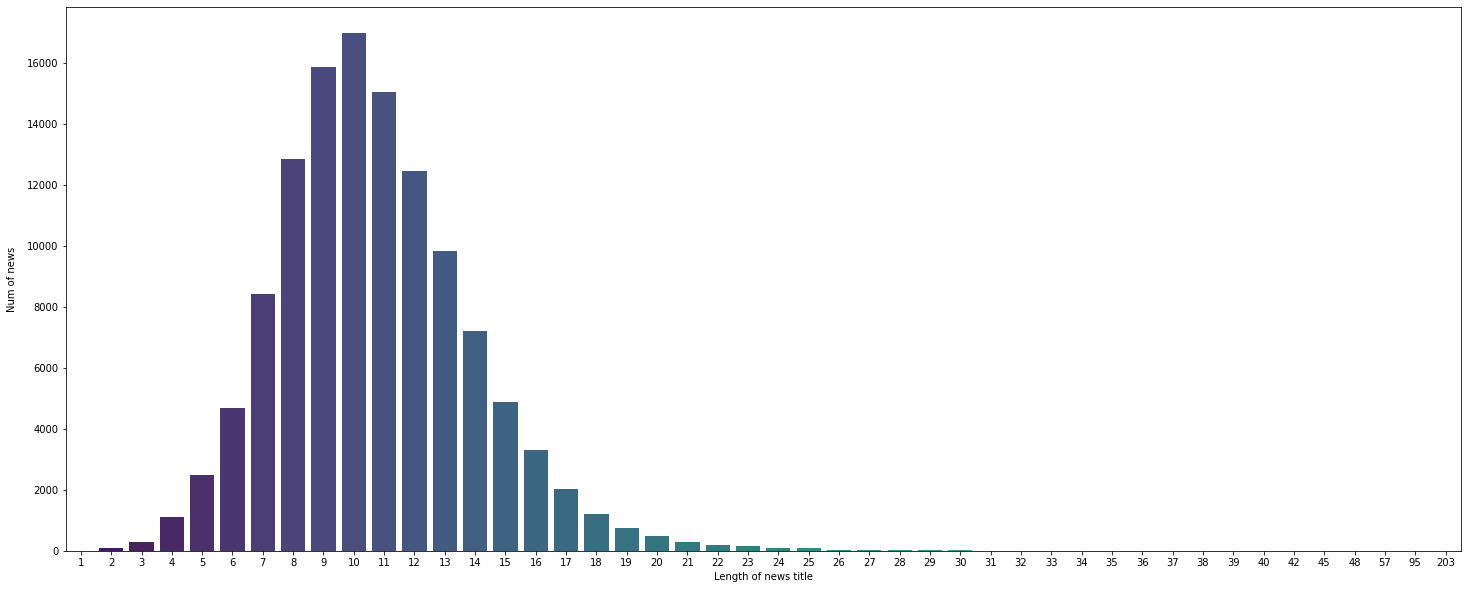

In [ ]:
#x1tmp, x2tmp = getxtick(list(len_title[0]),5)

plt.figure(figsize=(25,10))
sns.barplot(data = len_title, x = 0, y = 1 , palette='viridis')

#plt.xticks(x1tmp, x2tmp)
plt.xlabel('Length of news title')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
news_test['abstract'].replace(np.NaN, '', inplace = True)

In [ ]:
dict_len_abstract = {}
for x in tqdm(range(len(news_test))):
  len_x_tmp = get_len(news_test.loc[x,'abstract'])
  if(len_x_tmp in dict_len_abstract):
    dict_len_abstract[len_x_tmp] += 1
  else:
    if(len_x_tmp > 100):
      if(100 in dict_len_abstract):
        dict_len_abstract[100] += 1
      else:
        dict_len_abstract[100] = 1
    else:
      dict_len_abstract[len_x_tmp] = 1

len_abstract = pd.DataFrame(sorted(dict_len_abstract.items()))

100%|██████████| 120959/120959 [00:01<00:00, 69409.46it/s]


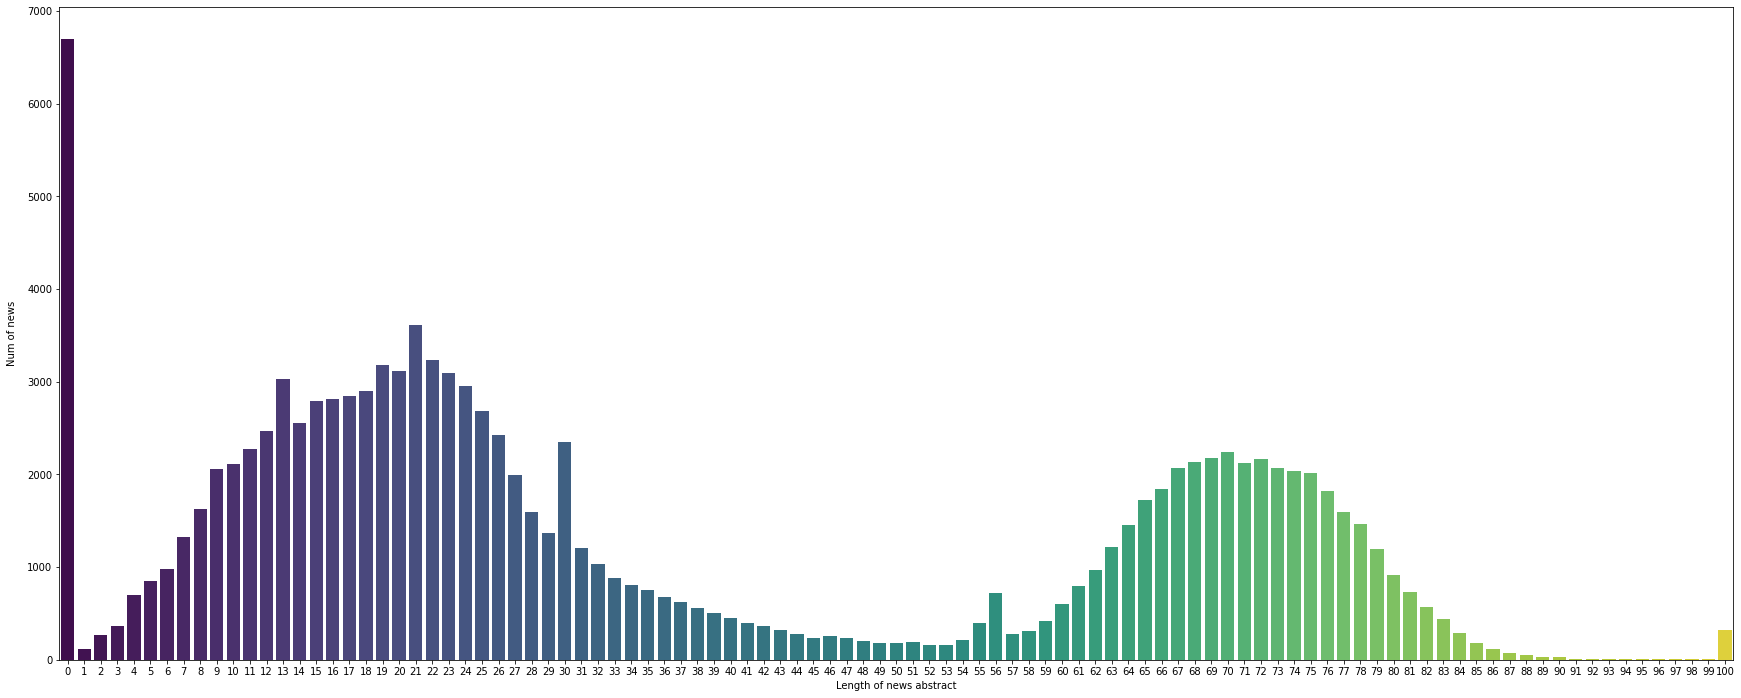

In [ ]:
#x1tmp, x2tmp = getxtick(list(len_title[0]),5)

plt.figure(figsize=(30,12))
sns.barplot(data = len_abstract, x = 0, y = 1 , palette='viridis')

#plt.xticks(x1tmp, x2tmp)
plt.xlabel('Length of news abstract')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
news_test['title_entities'].replace(np.NaN, '[]', inplace = True)
df = list(news_test['title_entities'])

count_tmp = {}

for x in tqdm(df):
  x = eval(x)  
  a = len(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 120959/120959 [00:03<00:00, 35046.52it/s]


 {0: 30954, 1: 49647, 2: 28939, 3: 9200, 4: 1829, 5: 317, 6: 50, 7: 18, 8: 3, 9: 2}


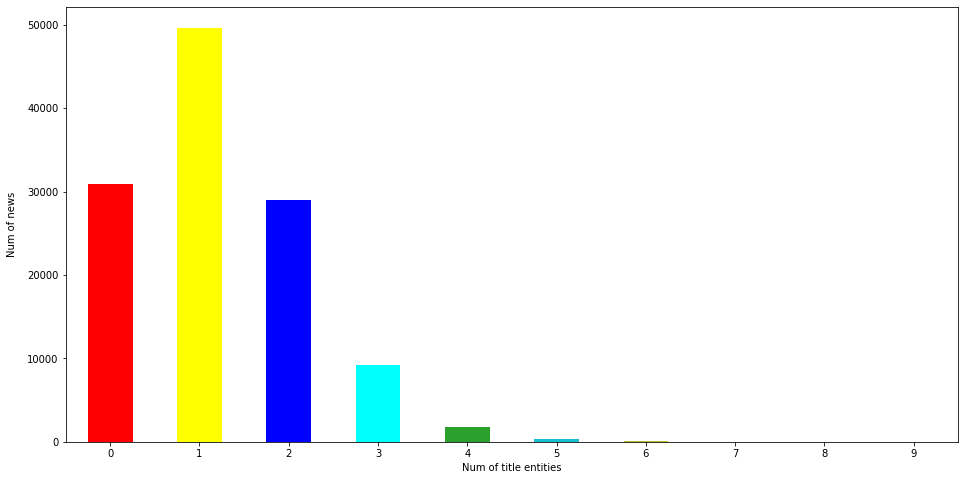

In [ ]:
plt.figure(figsize=(16,8))
pd.Series(count_tmp).plot(kind = 'bar', color = my_color)
plt.xticks(rotation=0)
plt.xlabel('Num of title entities')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
news_test['abstract_entities'].replace(np.NaN, '[]', inplace = True)
df = list(news_test['abstract_entities'])

count_tmp = {}

for x in tqdm(df):
  x = eval(x)  
  a = len(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 120959/120959 [00:04<00:00, 26861.89it/s]


 {0: 30381, 1: 28836, 2: 23446, 3: 15977, 4: 10067, 5: 5899, 6: 3287, 7: 1575, 8: 766, 9: 362, 10: 162, 11: 101, 12: 36, 13: 17, 14: 17, 15: 8, 16: 9, 17: 4, 18: 3, 19: 1, 21: 1, 22: 1, 23: 1, 24: 1, 30: 1}


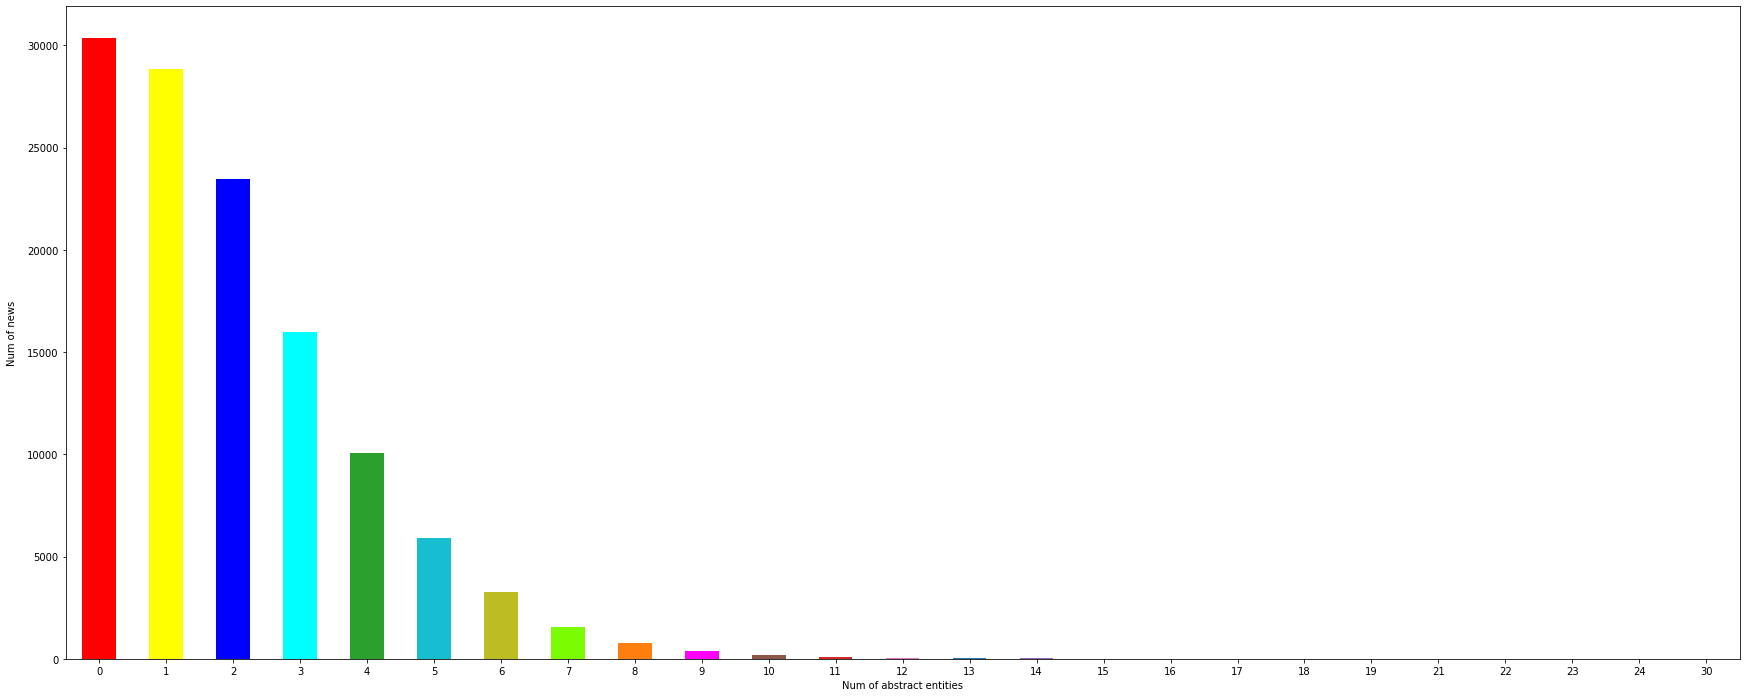

In [ ]:
plt.figure(figsize=(30,12))
pd.Series(count_tmp).plot(kind = 'bar', color = my_color)
plt.xticks(rotation=0)
plt.xlabel('Num of abstract entities')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
behaviors_test.head()

,id,user,time,history,impression
0,1,U64099,11/19/2019 11:37:45 AM,N121133 N104200 N43255 N55860 N128965 N38014 N...,N101071 N15647 N83400 N124838 N57092 N64623 N6...
1,2,U231077,11/19/2019 5:28:08 AM,N45124 N84730 N45128 N104312 N70022 N99111 N26...,N14657 N51253 N49521 N126571 N74286 N101071 N1...
2,3,U606012,11/19/2019 4:46:23 AM,N59893 N84662 N90686 N33265 N127225 N120859 N6...,N74286 N9250 N26898 N123737 N98301 N80580 N456...
3,4,U320649,11/21/2019 6:03:51 AM,N110863 N7889 N86335 N85056 N115743 N63372 N19...,N119559 N37657 N108085 N91287 N39136 N130190 N...
4,5,U357840,11/22/2019 10:36:19 AM,N98596 N85005 N15713 N67779 N47961 N55571 N666...,N60658 N43496 N65220 N9125 N63136 N83728 N3208...


In [ ]:
for ft in behaviors_test.columns:
    print(ft," : "," len: ",len(behaviors_test[ft].unique()),'\n',behaviors_test[ft].unique())

id  :   len:  2370727 
 [      1       2       3 ... 2370725 2370726 2370727]
user  :   len:  702005 
 ['U64099' 'U231077' 'U606012' ... 'U689291' 'U761672' 'U160629']
time  :   len:  495505 
 ['11/19/2019 11:37:45 AM' '11/19/2019 5:28:08 AM' '11/19/2019 4:46:23 AM'
 ... '11/19/2019 8:54:24 PM' '11/20/2019 7:00:35 PM'
 '11/20/2019 10:38:57 PM']
history  :   len:  696831 
 ['N121133 N104200 N43255 N55860 N128965 N38014 N89445 N66089 N90367 N1128 N117219 N65119 N116090 N116464 N49705 N122682 N748 N62415 N49511 N63918 N90367 N560 N34058 N122682 N66666 N109962 N6958 N63174 N108801 N110976 N118629 N31390 N42718 N82405 N16941 N47739 N53474 N18190'
 'N45124 N84730 N45128 N104312 N70022 N99111 N26417 N37013 N7229 N4858 N16403 N93643 N7968 N27368'
 'N59893 N84662 N90686 N33265 N127225 N120859 N61029 N116144 N75821 N8063 N40822 N127336 N24786 N4041 N1881 N9372 N91597 N22259 N114376 N8223 N50428 N91974 N20250'
 ...
 'N66190 N93049 N121418 N12070 N42718 N59936 N28348 N125953 N47011 N45752 N47257'


In [ ]:
for ft in behaviors_test.columns:
    print(ft," : ",behaviors_test[ft].isna().sum())

id  :  0
user  :  0
time  :  0
history  :  29108
impression  :  0


In [ ]:
df_nohis = behaviors_test[behaviors_test.history.isna()]

In [ ]:
print(df_nohis)

              id     user                    time history  \
106          107  U762438   11/19/2019 6:41:02 PM     NaN   
310          311  U825443   11/21/2019 3:09:00 PM     NaN   
356          357  U791162  11/21/2019 10:49:39 PM     NaN   
379          380  U802247   11/18/2019 1:47:34 PM     NaN   
476          477  U793586   11/18/2019 7:15:45 AM     NaN   
...          ...      ...                     ...     ...   
2370349  2370350  U805875   11/17/2019 8:06:03 AM     NaN   
2370384  2370385  U794788   11/18/2019 7:05:31 AM     NaN   
2370585  2370586  U794294   11/21/2019 7:19:15 PM     NaN   
2370588  2370589  U822537  11/22/2019 11:25:23 AM     NaN   
2370615  2370616  U807678   11/22/2019 8:26:31 AM     NaN   

                                                impression  
106      N9490 N108782 N102798 N3365 N33844 N36543 N695...  
310      N109886 N51568 N110246 N20933 N46620 N85565 N1...  
356      N80323 N10950 N74757 N111693 N31552 N82186 N37...  
379                    

In [ ]:
len(df_nohis['user'].unique())

3993

In [ ]:
list_impression = list(df_nohis['impression'])

In [ ]:
print(len(list_impression))

29108


In [ ]:
df = list(behaviors_test['time'])

count_tmp = {}

for x in tqdm(df):
  a = x.split('/')
  if(a[1] in count_tmp):
    count_tmp[a[1]] += 1
  else:
    count_tmp[a[1]] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 2370727/2370727 [00:01<00:00, 1582005.96it/s]


 {'16': 83700, '17': 168742, '18': 447628, '19': 412708, '20': 439238, '21': 420965, '22': 397746}


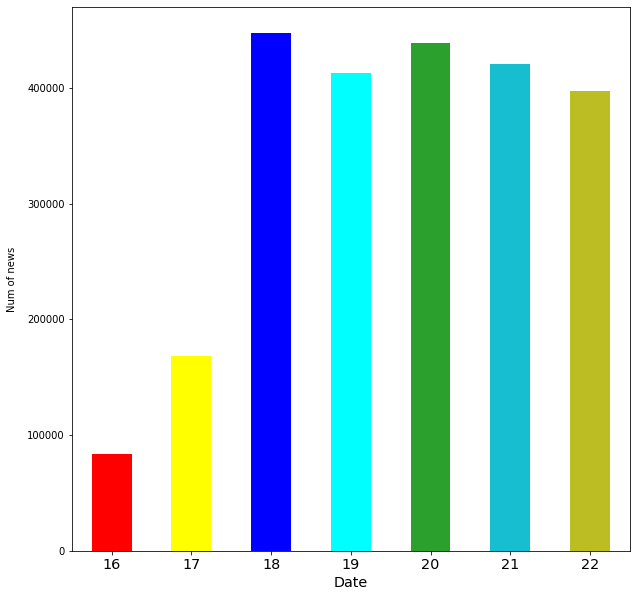

In [ ]:
plt.figure(figsize=(10,10))
pd.Series(count_tmp).plot(kind = 'bar', color = my_color)
plt.xticks(rotation=0, fontsize = 'x-large')
plt.xlabel('Date',fontsize = 'x-large')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
df = list(behaviors_test['time'])

count_tmp = {}

for x in tqdm(df):
  a = get_hour(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 2370727/2370727 [00:03<00:00, 738680.62it/s] 


 {0: 16037, 1: 17118, 2: 24533, 3: 43702, 4: 79475, 5: 127222, 6: 156742, 7: 171503, 8: 177472, 9: 181002, 10: 179106, 11: 186061, 12: 184861, 13: 171877, 14: 133516, 15: 97237, 16: 99753, 17: 76692, 18: 68305, 19: 56328, 20: 44909, 21: 33153, 22: 25082, 23: 19041}


In [ ]:
for x in range(24):
  print("'",x,"h-",x+1,"h',",sep='',end='')

'0h-1h','1h-2h','2h-3h','3h-4h','4h-5h','5h-6h','6h-7h','7h-8h','8h-9h','9h-10h','10h-11h','11h-12h','12h-13h','13h-14h','14h-15h','15h-16h','16h-17h','17h-18h','18h-19h','19h-20h','20h-21h','21h-22h','22h-23h','23h-24h',

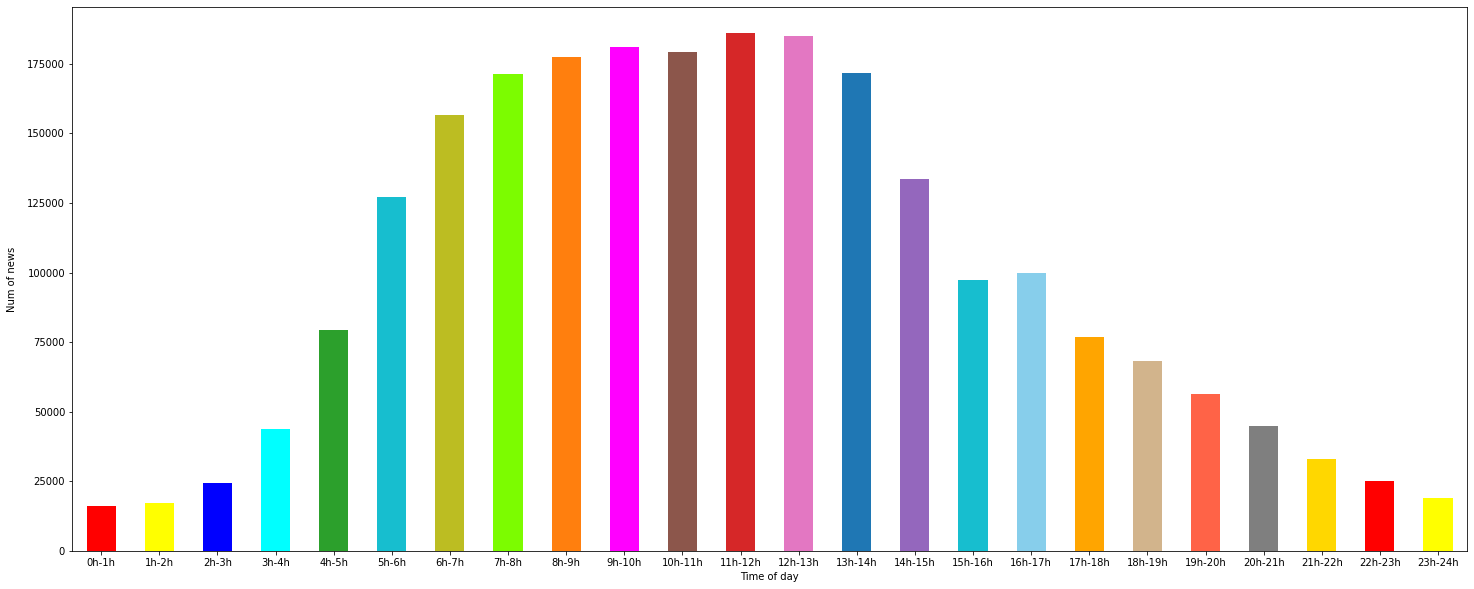

In [ ]:
plt.figure(figsize=(25,10))
pd.Series(count_tmp).plot(kind = 'bar', color = my_color)
plt.xticks(rotation=0)
plt.xticks(list(np.arange(0,24,1)),['0h-1h','1h-2h','2h-3h','3h-4h','4h-5h',
                                    '5h-6h','6h-7h','7h-8h','8h-9h','9h-10h',
                                    '10h-11h','11h-12h','12h-13h','13h-14h',
                                    '14h-15h','15h-16h','16h-17h','17h-18h',
                                    '18h-19h','19h-20h','20h-21h','21h-22h',
                                    '22h-23h','23h-24h'])
plt.xlabel('Time of day')
plt.ylabel('Num of news', labelpad=10 )
plt.show()

In [ ]:
df = list(behaviors_test['user'])

df_u = list(behaviors_test['user'].unique())

In [ ]:
print(len(df))
print(len(df_u))

cnt_user = {}

for x in df:
  if(x in cnt_user):
    cnt_user[x] += 1
  else:
    cnt_user[x] = 1

2370727
702005


In [ ]:
cnt_user_f = {}

for x in cnt_user.values():
  if(x in cnt_user_f):
    cnt_user_f[x] += 1
  else:
    cnt_user_f[x] = 1

cnt_user_f = dict(sorted(cnt_user_f.items()))

print(cnt_user_f)

{1: 217946, 2: 159387, 3: 103114, 4: 65471, 5: 43864, 6: 29683, 7: 20643, 8: 14767, 9: 11006, 10: 7989, 11: 6097, 12: 4656, 13: 3628, 14: 2764, 15: 2129, 16: 1726, 17: 1349, 18: 1090, 19: 843, 20: 707, 21: 547, 22: 450, 23: 343, 24: 292, 25: 278, 26: 216, 27: 141, 28: 131, 29: 109, 30: 88, 31: 69, 32: 76, 33: 56, 34: 57, 35: 47, 36: 30, 37: 39, 38: 16, 39: 23, 40: 17, 41: 12, 42: 15, 43: 11, 44: 8, 45: 7, 46: 7, 47: 11, 48: 6, 49: 5, 50: 4, 51: 5, 52: 2, 53: 2, 54: 3, 55: 3, 56: 4, 57: 1, 58: 2, 59: 2, 60: 1, 62: 1, 64: 3, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 96: 1}


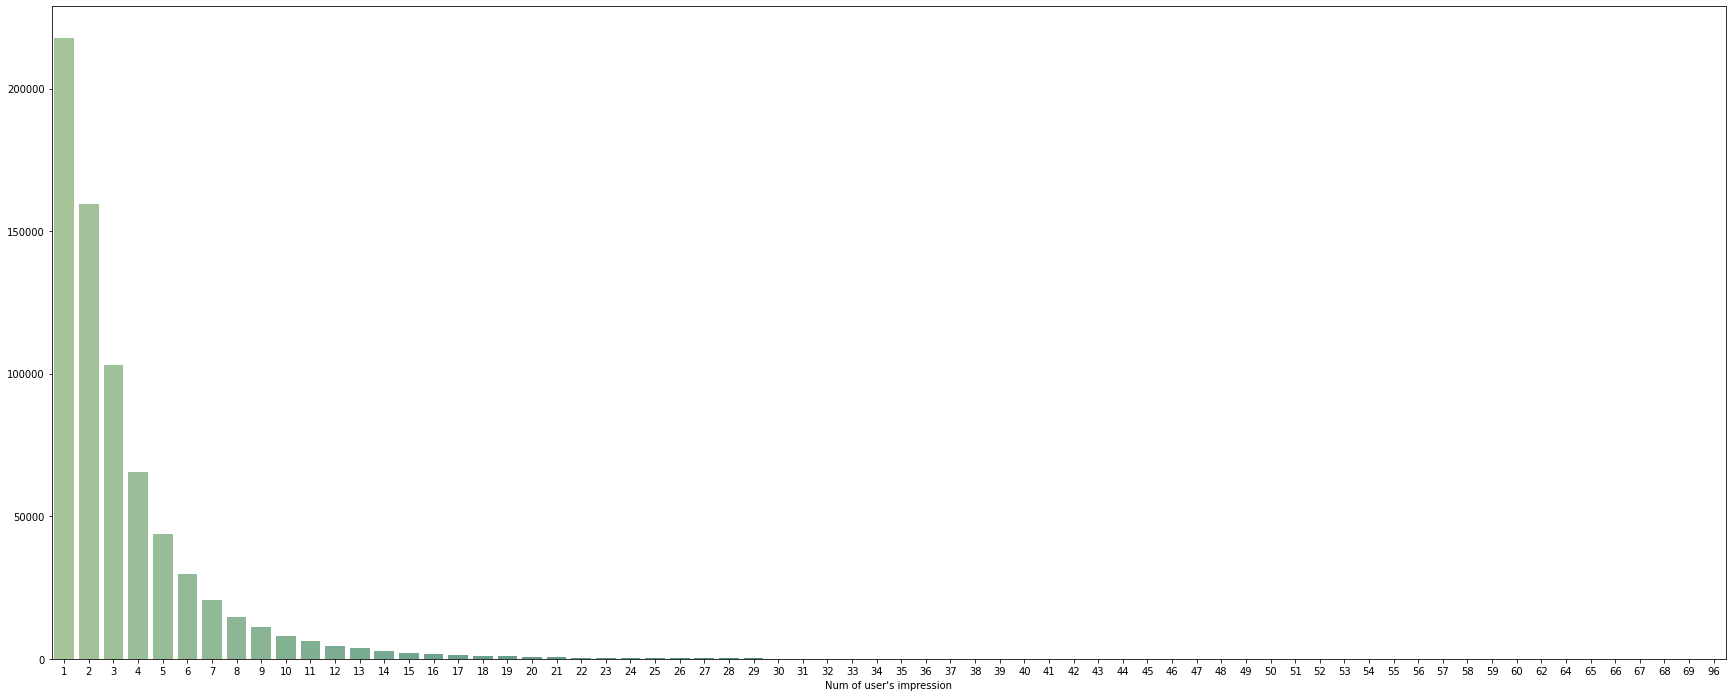

In [ ]:
cnt_user_f_tmp = pd.DataFrame(cnt_user_f.items())

plt.figure(figsize=(30,12))
sns.barplot(data = cnt_user_f_tmp, x = 0, y = 1 , palette='crest')
plt.xlabel("Num of user's impression")
plt.ylabel('')
plt.show()

In [ ]:
behaviors_test.replace(np.NaN, '', inplace = True)
df = list(behaviors_test['history'])

count_tmp = {}

for x in tqdm(df):
  a = get_len(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

100%|██████████| 2370727/2370727 [00:19<00:00, 119954.85it/s]


 {0: 29108, 1: 11622, 2: 24557, 3: 47459, 4: 73847, 5: 76145, 6: 73652, 7: 71025, 8: 66272, 9: 62871, 10: 59878, 11: 56110, 12: 53559, 13: 50818, 14: 47748, 15: 45208, 16: 43027, 17: 42220, 18: 40291, 19: 38993, 20: 36734, 21: 35041, 22: 33896, 23: 32568, 24: 31742, 25: 31249, 26: 29553, 27: 28473, 28: 26903, 29: 27313, 30: 25726, 31: 24462, 32: 24921, 33: 23390, 34: 22943, 35: 22464, 36: 21210, 37: 20766, 38: 20176, 39: 20127, 40: 19148, 41: 18032, 42: 17603, 43: 17531, 44: 16706, 45: 15961, 46: 16146, 47: 15628, 48: 15138, 49: 15043, 50: 14187, 51: 14411, 52: 13418, 53: 13595, 54: 13255, 55: 12954, 56: 11961, 57: 12792, 58: 11765, 59: 11702, 60: 11009, 61: 10322, 62: 10569, 63: 10545, 64: 10463, 65: 10096, 66: 9962, 67: 9446, 68: 8760, 69: 8639, 70: 8479, 71: 8776, 72: 7979, 73: 7782, 74: 7730, 75: 7589, 76: 7283, 77: 8239, 78: 6671, 79: 6777, 80: 6638, 81: 5835, 82: 6382, 83: 5697, 84: 6680, 85: 6016, 86: 6072, 87: 5994, 88: 5171, 89: 5593, 90: 4840, 91: 5085, 92: 4853, 93: 4860, 9

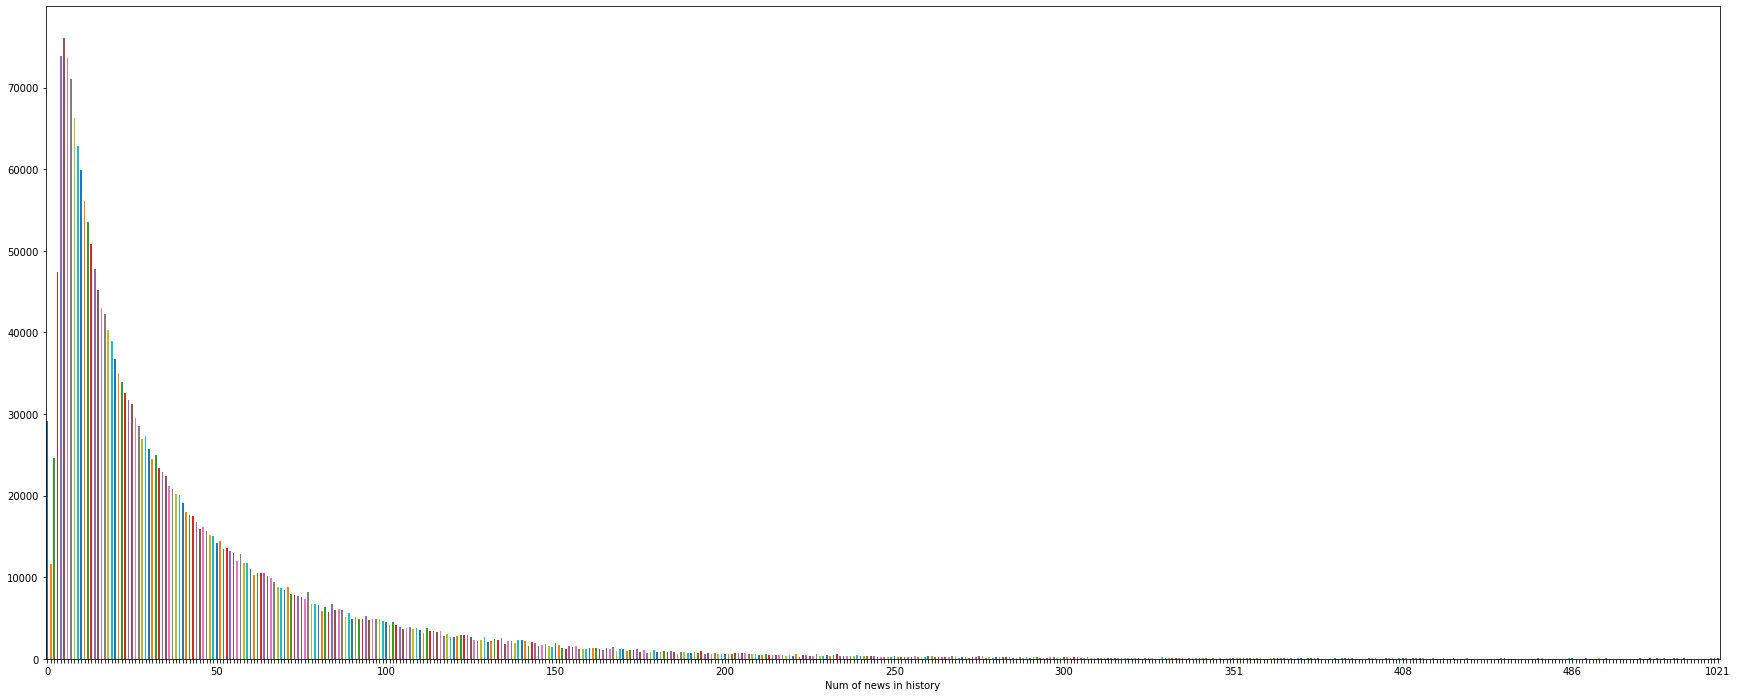

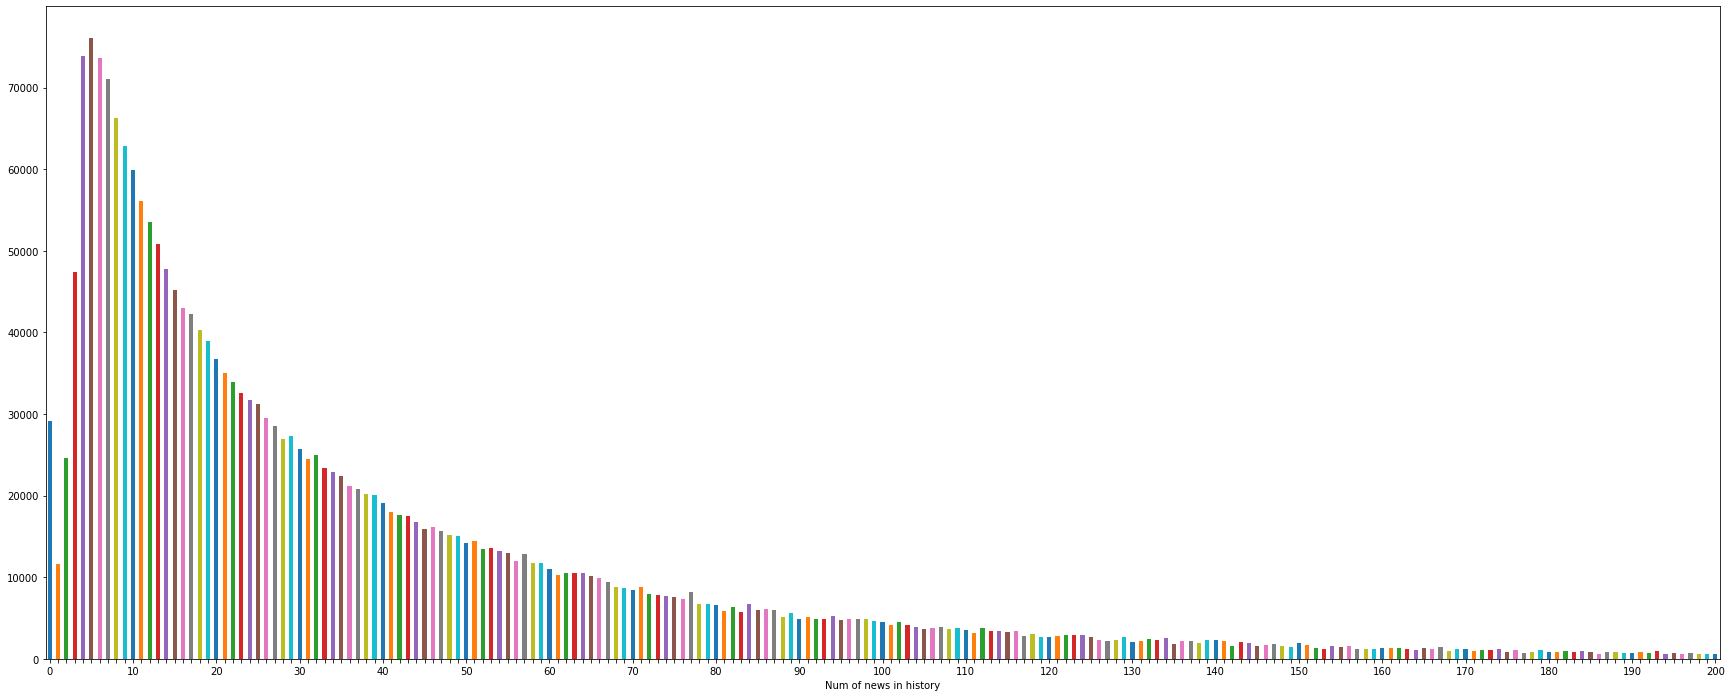

In [ ]:
x1tmp, x2tmp = getxtick(list(count_tmp),50)

plt.figure(figsize=(30,12))
pd.Series(count_tmp).loc[:].plot(kind = 'bar', color = mcolors.TABLEAU_COLORS)
plt.xticks(x1tmp, x2tmp, rotation = 0)
plt.xlabel('Num of news in history')
plt.show()



x1tmp, x2tmp = getxtick(list(count_tmp)[:201],10)

plt.figure(figsize=(30,12))
pd.Series(count_tmp).loc[:200].plot(kind = 'bar', color = mcolors.TABLEAU_COLORS)
plt.xticks(x1tmp, x2tmp, rotation = 0)
plt.xlabel('Num of news in history')
plt.show()

In [ ]:
df = list(behaviors_test['impression'])
print(len(df))

count_tmp = {}

for x in tqdm(df):
  a = get_len(x)
  if(a in count_tmp):
    count_tmp[a] += 1
  else:
    count_tmp[a] = 1

count_tmp = dict(sorted(count_tmp.items(), key=lambda x: int(x[0])))

print('\n',count_tmp)

2370727


100%|██████████| 2370727/2370727 [00:19<00:00, 124289.22it/s]


 {1: 1, 2: 172717, 3: 23454, 4: 63876, 5: 82042, 6: 64212, 7: 74919, 8: 40034, 9: 41339, 10: 52930, 11: 51403, 12: 49201, 13: 40222, 14: 36870, 15: 30174, 16: 40618, 17: 45678, 18: 30492, 19: 35153, 20: 33413, 21: 36915, 22: 43137, 23: 31343, 24: 30564, 25: 35294, 26: 39619, 27: 37607, 28: 30933, 29: 24938, 30: 25331, 31: 25371, 32: 24542, 33: 19986, 34: 22077, 35: 20648, 36: 19920, 37: 22936, 38: 18918, 39: 17477, 40: 18849, 41: 20281, 42: 21839, 43: 20221, 44: 16059, 45: 14425, 46: 15346, 47: 16591, 48: 17636, 49: 15708, 50: 13374, 51: 12569, 52: 12313, 53: 13518, 54: 14065, 55: 12944, 56: 11606, 57: 11253, 58: 11231, 59: 12005, 60: 12086, 61: 11020, 62: 9947, 63: 9849, 64: 9920, 65: 10643, 66: 11039, 67: 9885, 68: 9355, 69: 9204, 70: 9030, 71: 9403, 72: 9228, 73: 8464, 74: 7952, 75: 7961, 76: 7826, 77: 8295, 78: 7987, 79: 7123, 80: 6759, 81: 6953, 82: 6989, 83: 7401, 84: 7269, 85: 6914, 86: 6374, 87: 6511, 88: 6474, 89: 6397, 90: 6379, 91: 5988, 92: 5420, 93: 5306, 94: 5223, 95: 53

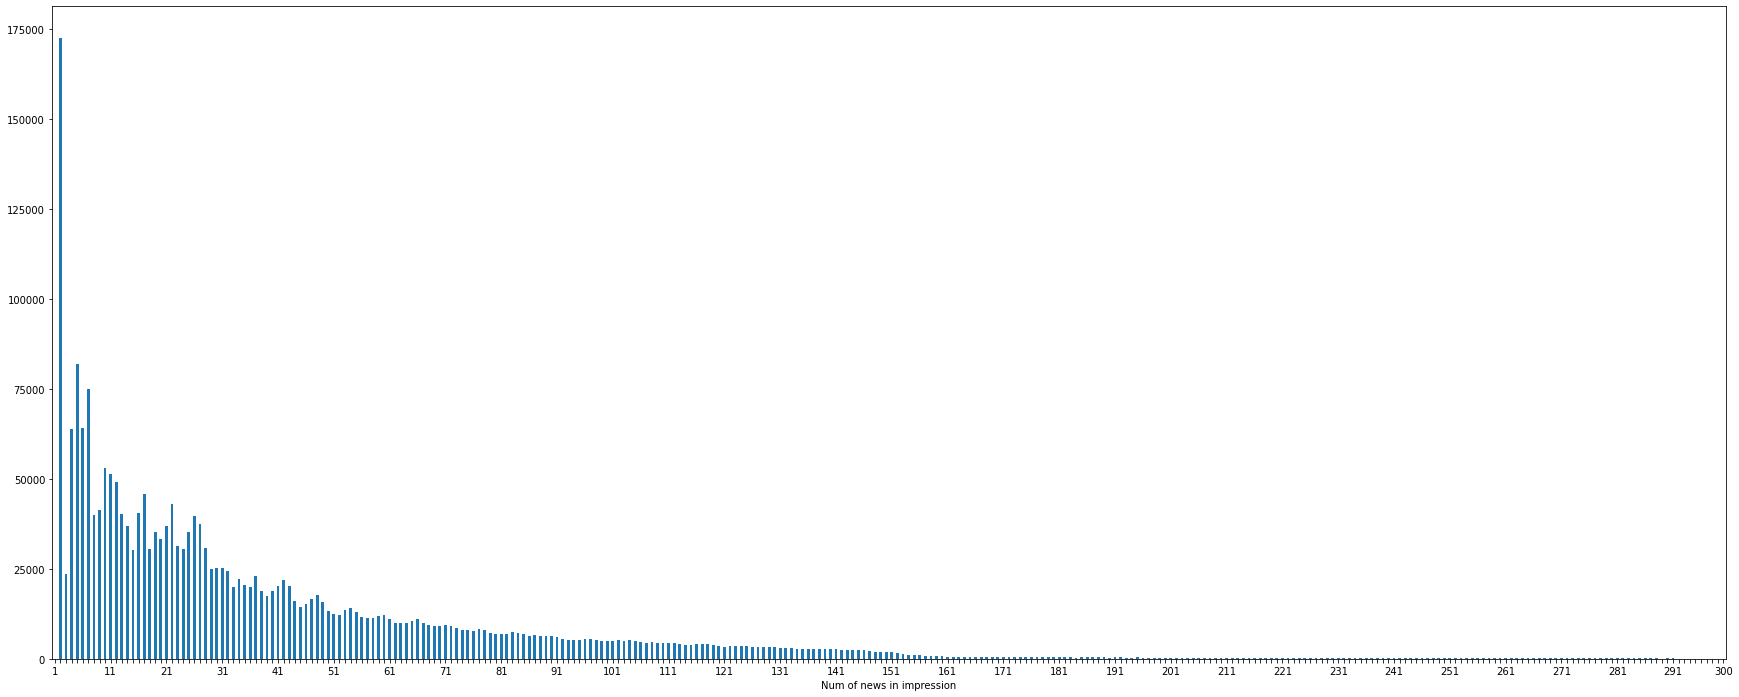

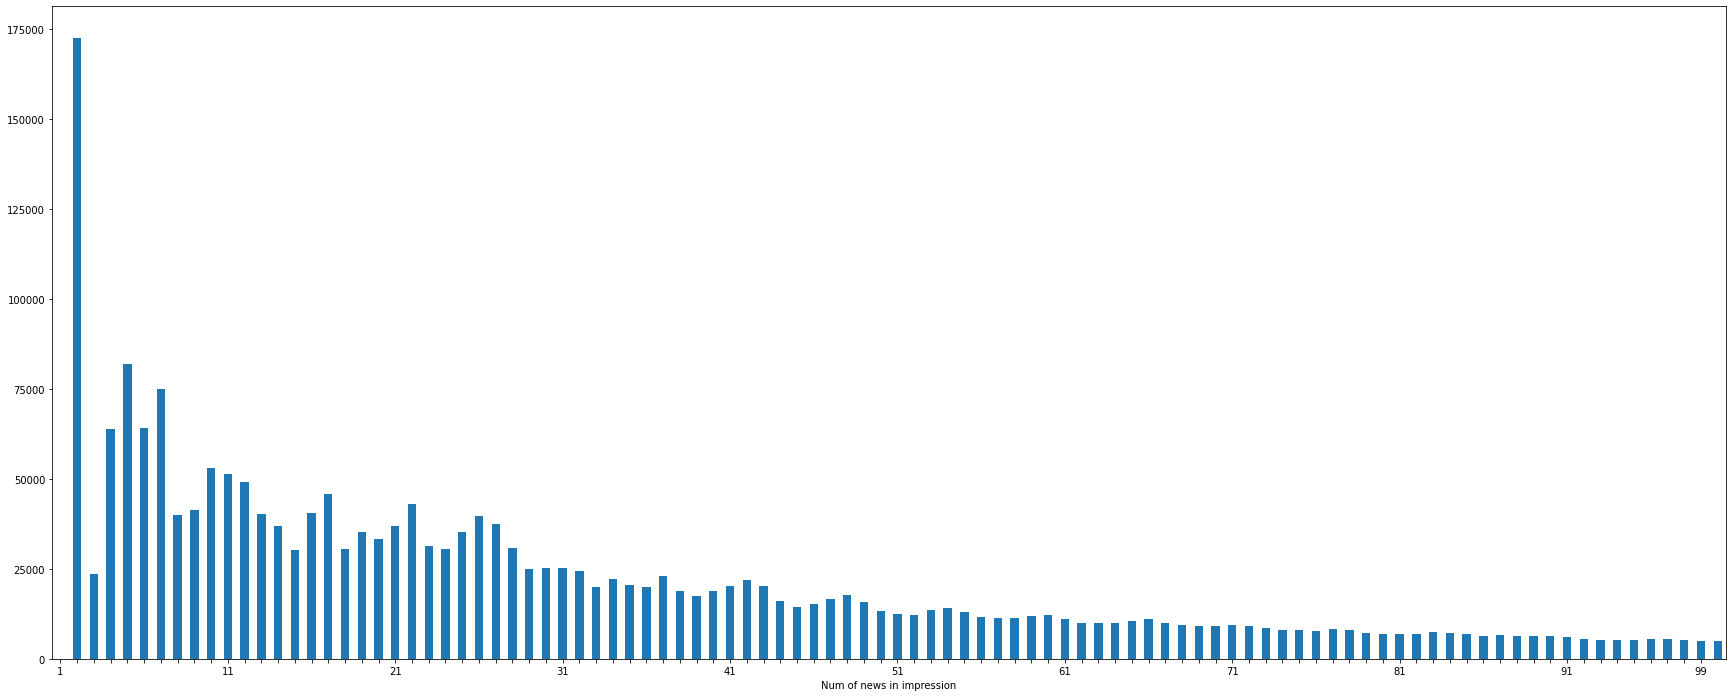

In [ ]:
x1tmp, x2tmp = getxtick(list(count_tmp),10)

plt.figure(figsize=(30,12))
pd.Series(count_tmp).plot(kind = 'bar')
plt.xticks(x1tmp, x2tmp, rotation=0)
plt.xlabel('Num of news in impression')
plt.show()


x1tmp, x2tmp = getxtick(list(count_tmp)[:99],10)

plt.figure(figsize=(30,12))
pd.Series(count_tmp).loc[:100].plot(kind = 'bar')
plt.xticks(x1tmp, x2tmp, rotation=0)
plt.xlabel('Num of news in impression')
plt.show()


In [ ]:
list_news_train = news_train['news'].unique()
list_news_dev = news_dev['news'].unique()
list_news_test = news_test['news'].unique()

In [ ]:
print(len(list_news_train))
print(len(list_news_dev))
print(len(list_news_test))

101527
72023
120959


In [ ]:
tmp = set(list_news_dev)-set(list_news_train)
print(len(tmp))

2624


In [ ]:
tmp = set(list_news_test)-set(list_news_train)
print(len(tmp))

28281


In [ ]:
tmp_text = 'category'

tmp_train = news_train[tmp_text].unique()
tmp_dev = news_dev[tmp_text].unique()
tmp_test = news_test[tmp_text].unique()

print(len(tmp_train))
print(len(tmp_dev))
print(len(tmp_test))

18
17
18


In [ ]:
for x in tmp_train:
  print(x,", ",sep = '',end = '')

lifestyle, news, health, sports, weather, entertainment, foodanddrink, autos, travel, video, finance, tv, movies, music, kids, middleeast, games, northamerica, 

In [ ]:
print(set(tmp_train) - set(tmp_dev))
print(set(tmp_train) - set(tmp_test))

{'northamerica'}
set()


In [ ]:
tmp_text = 'subcat'

tmp_train = news_train[tmp_text].unique()
tmp_dev = news_dev[tmp_text].unique()
tmp_test = news_test[tmp_text].unique()

print(len(tmp_train))
print(len(tmp_dev))
print(len(tmp_test))

285
269
290


In [ ]:
print(set(tmp_train) - set(tmp_dev))

{'northamerica-video', 'entertainmenttv', 'tennis_intl', 'basketball', 'travel-accessible', 'finance-savingsrates', 'entertainmentmusic', 'healthandfitness', 'finance-insidetheticker', 'foodanddrink', 'soccer_videos', 'soccer_bund', 'halloween', 'spendingandborrowing', 'lifestyledesign', 'shop-toys'}


In [ ]:
print(set(tmp_train) - set(tmp_test))
print(set(tmp_test) - set(tmp_train))

{'newslocalpolitics', 'soccer_bund', 'shop-toys'}
{'healthtrending', 'seasonalvideos', 'causes-gender-equality', 'grammys-video', 'opinion-polls', 'foodvideos', 'localnews', 'style'}


In [ ]:
tmp_text = 'id'

tmp_train = behaviors_train[tmp_text].unique()
tmp_dev = behaviors_dev[tmp_text].unique()
tmp_test = behaviors_test[tmp_text].unique()

print(len(tmp_train))
print(len(tmp_dev))
print(len(tmp_test))

2232748
376471
2370727


In [ ]:
tmp_text = 'user'

tmp_train = behaviors_train[tmp_text].unique()
tmp_dev = behaviors_dev[tmp_text].unique()
tmp_test = behaviors_test[tmp_text].unique()

print(len(tmp_train))
print(len(tmp_dev))
print(len(tmp_test))

711222
255990
702005


In [ ]:
tmp = set(tmp_dev)-set(tmp_train)
print(len(tmp))

39212


In [ ]:
tmp = set(tmp_test)-set(tmp_train)
print(len(tmp))

155260
